In [1056]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode()
%matplotlib inline
import seaborn as sns
from pylab import rcParams

# SPARKLING

# 1. Read the data as an appropriate Time Series data and plot the data.

# Reading the data

In [1057]:
df = pd.read_csv("~chetandeshpande/Downloads/download-23.csv", parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [1058]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

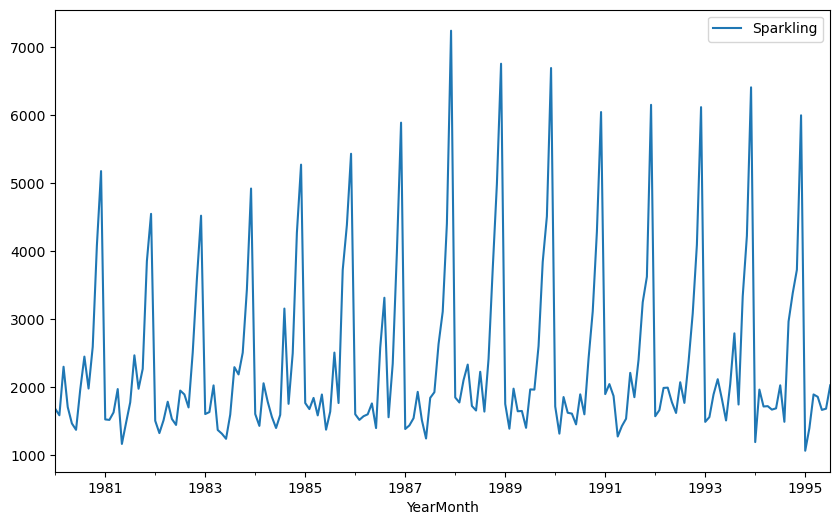

In [1059]:
rcParams['figure.figsize'] = 10, 6
df.plot()
plt.show()

# EDA

In [1060]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1061]:
df.shape

(187, 1)

In [1062]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [1063]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [1064]:
df.isnull().sum()

Sparkling    0
dtype: int64

# Yearly Boxplot

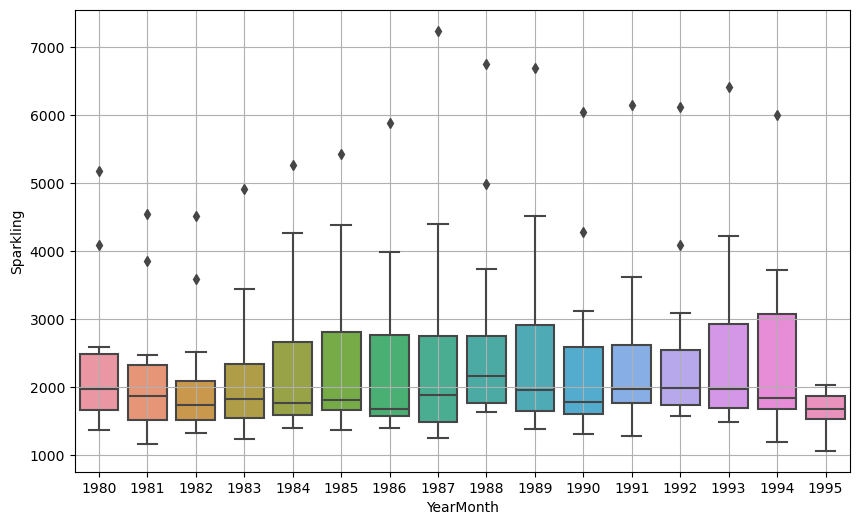

In [1065]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

# Monthly Plot

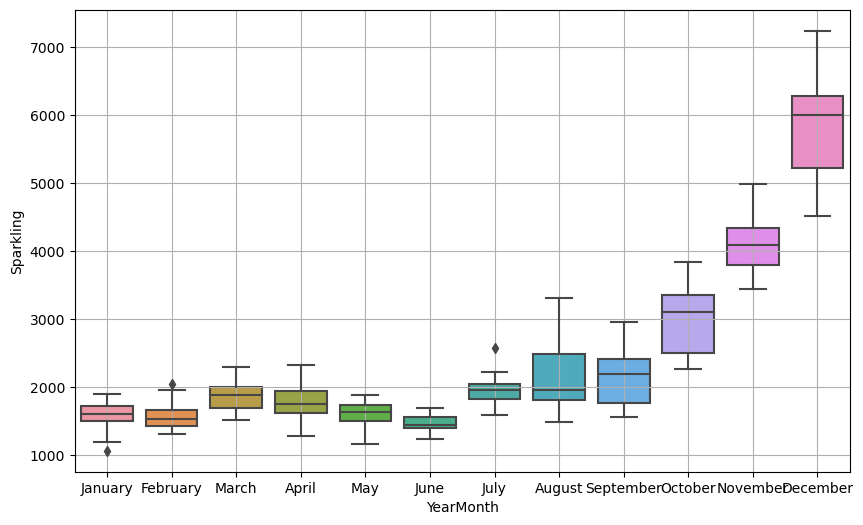

In [1066]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

# Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

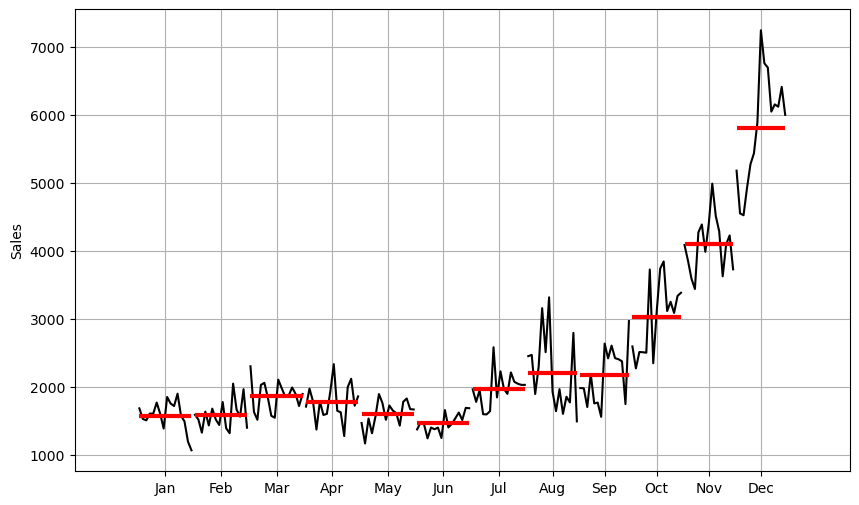

In [1067]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Sparkling'],ylabel='Sales')
plt.grid();

# Plot a graph of monthly RetailSales across years.

In [1068]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

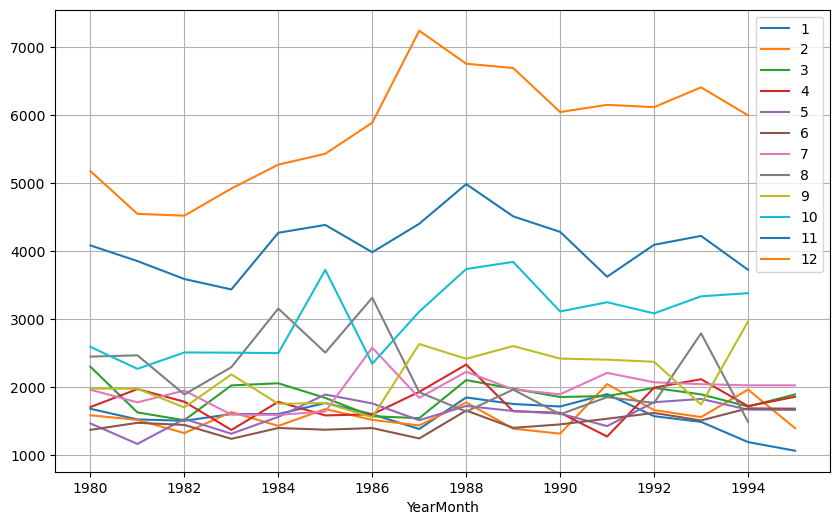

In [1069]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Plot the Empirical Cumulative Distribution.

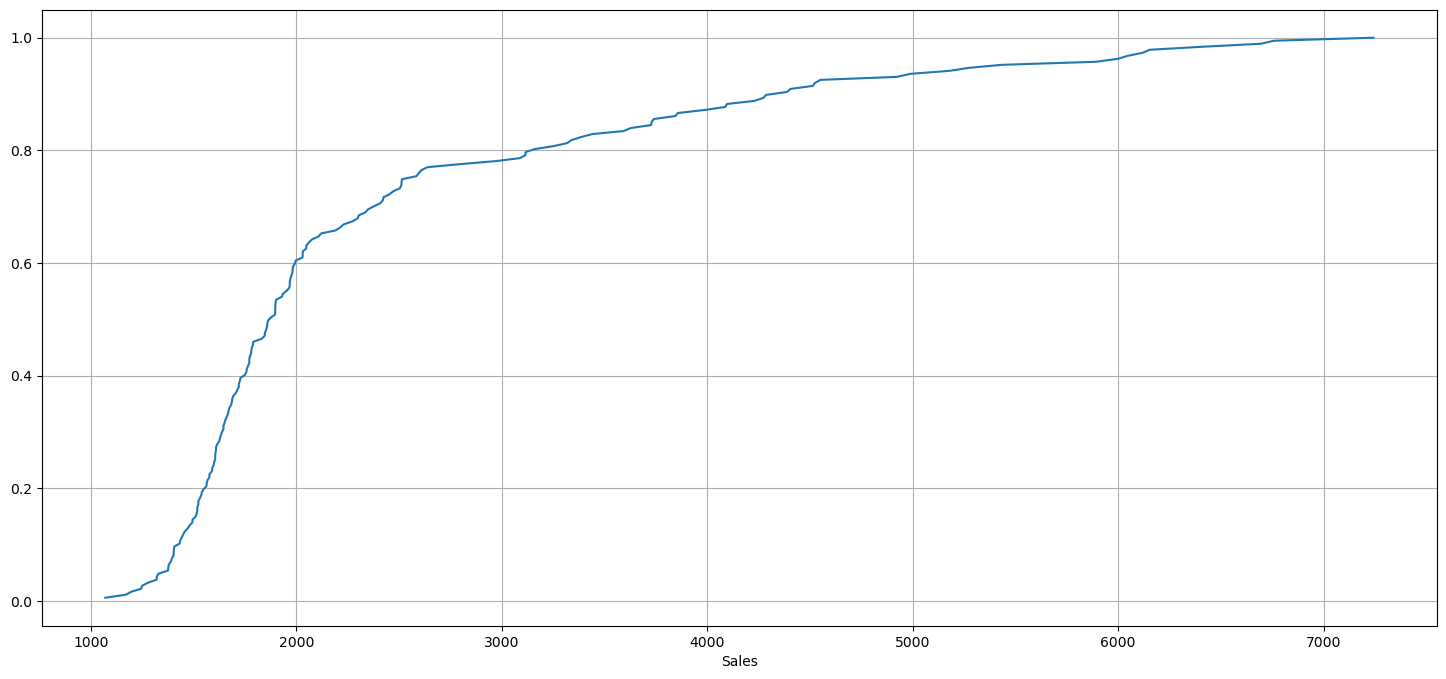

In [1070]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [1071]:
# This particular graph tells us what percentage of data points refer to what number of Sales.

# Plot the average RetailSales per month and the month on month percentage change of RetailSales.

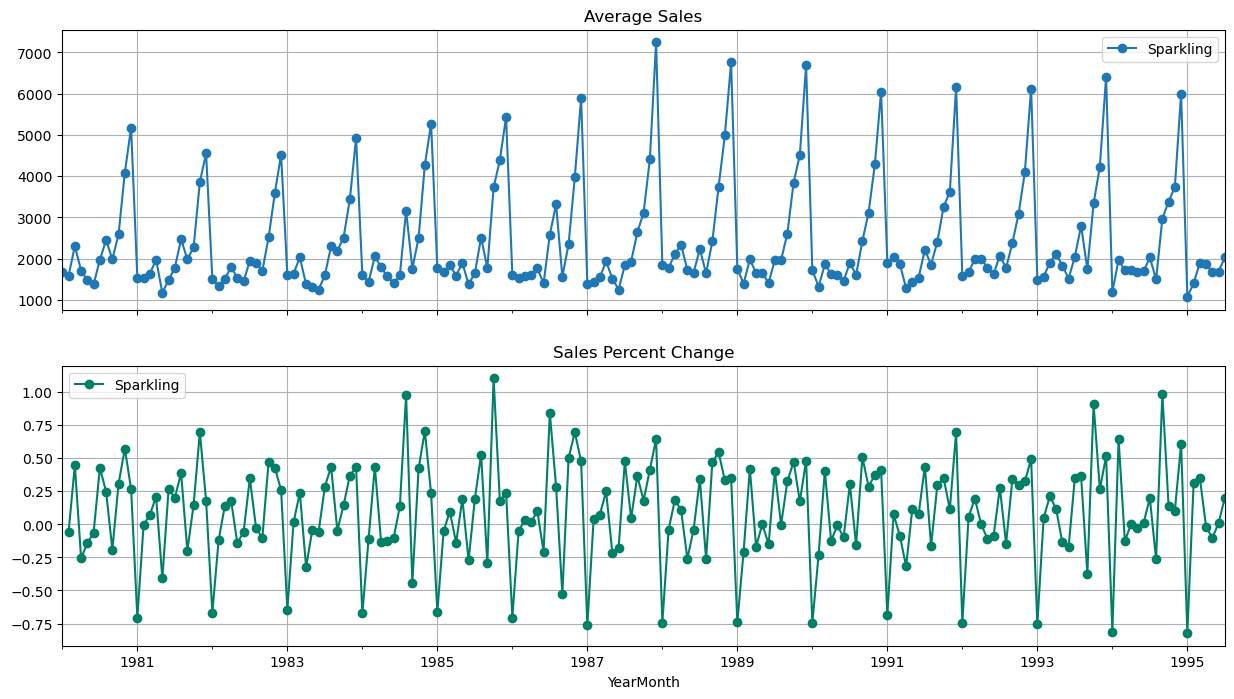

In [1072]:
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

# Decompose the Time Series and plot the different components.

In [1073]:
from statsmodels.tsa.seasonal import seasonal_decompose

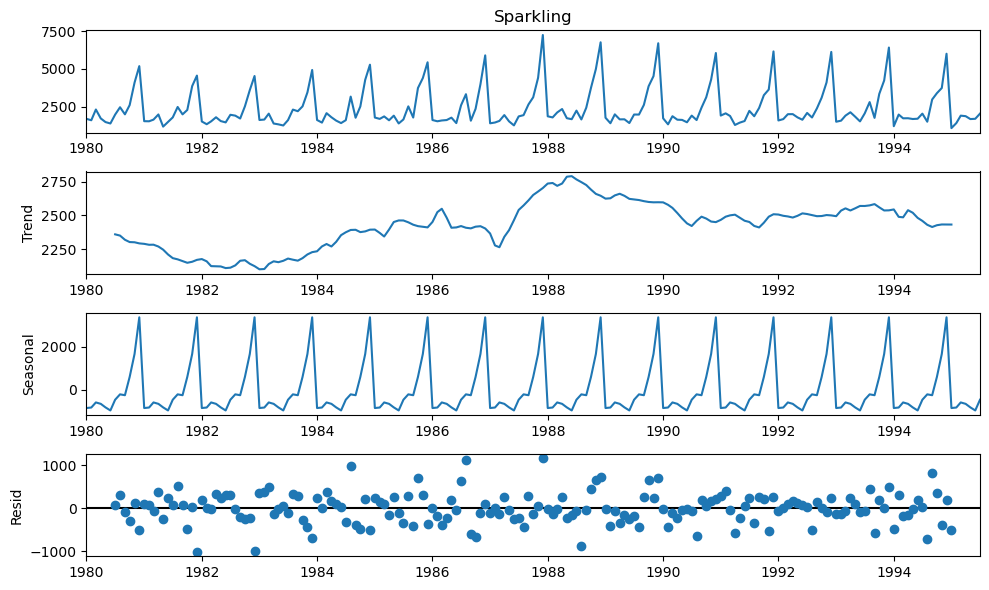

In [1074]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [1075]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


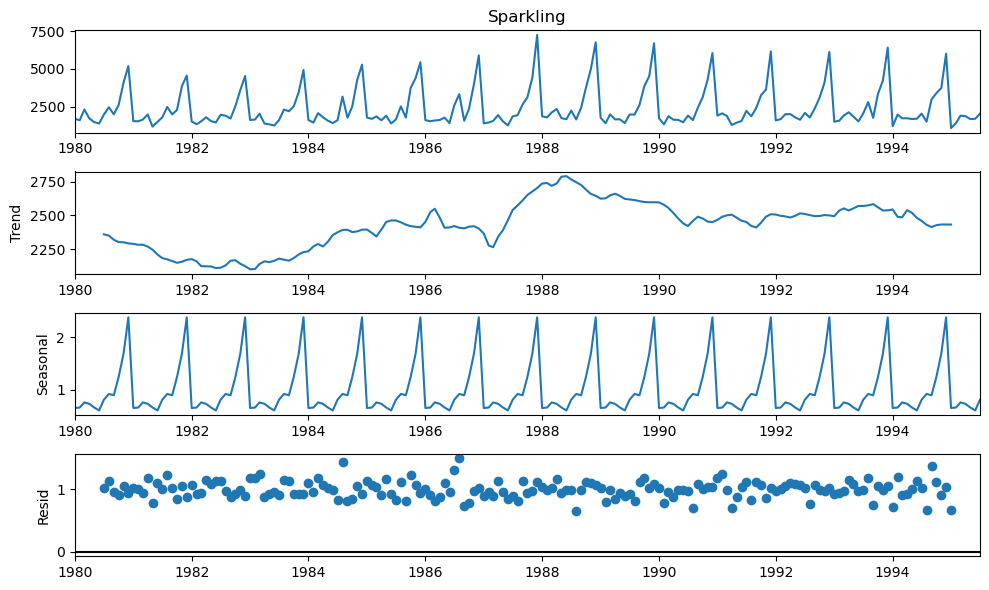

In [1076]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [1077]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

In [1078]:
# The seasonal variation is independent of the trend, hence it is an additive decomposition is the right way to decompose the time series.

# 3. Split the data into training and test. The test data should start in 1991.

In [1079]:
df.shape

(187, 1)

In [1080]:
df.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1081]:
df.tail()

Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [1082]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [1083]:
train.shape

(132, 1)

In [1084]:
test.shape

(55, 1)

In [1085]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

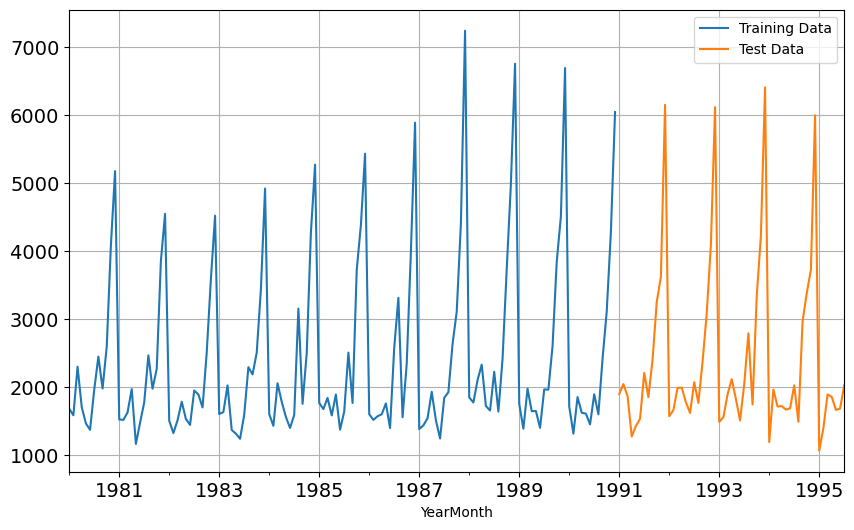

In [1086]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [1087]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tools.eval_measures as em

# Simple Exponential Smoothing 

In [1088]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1089]:
model_SES_autofit = model_SES.fit(optimized=True)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [1090]:
model_SES_autofit.params

{'smoothing_level': 0.07028781460389553,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1763.9269926897714,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1091]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-01    2804.662714
1991-02-01    2804.662714
1991-03-01    2804.662714
1991-04-01    2804.662714
1991-05-01    2804.662714
1991-06-01    2804.662714
1991-07-01    2804.662714
1991-08-01    2804.662714
1991-09-01    2804.662714
1991-10-01    2804.662714
1991-11-01    2804.662714
1991-12-01    2804.662714
1992-01-01    2804.662714
1992-02-01    2804.662714
1992-03-01    2804.662714
1992-04-01    2804.662714
1992-05-01    2804.662714
1992-06-01    2804.662714
1992-07-01    2804.662714
1992-08-01    2804.662714
1992-09-01    2804.662714
1992-10-01    2804.662714
1992-11-01    2804.662714
1992-12-01    2804.662714
1993-01-01    2804.662714
1993-02-01    2804.662714
1993-03-01    2804.662714
1993-04-01    2804.662714
1993-05-01    2804.662714
1993-06-01    2804.662714
1993-07-01    2804.662714
1993-08-01    2804.662714
1993-09-01    2804.662714
1993-10-01    2804.662714
1993-11-01    2804.662714
1993-12-01    2804.662714
1994-01-01    2804.662714
1994-02-01    2804.662714
1994-03-01  

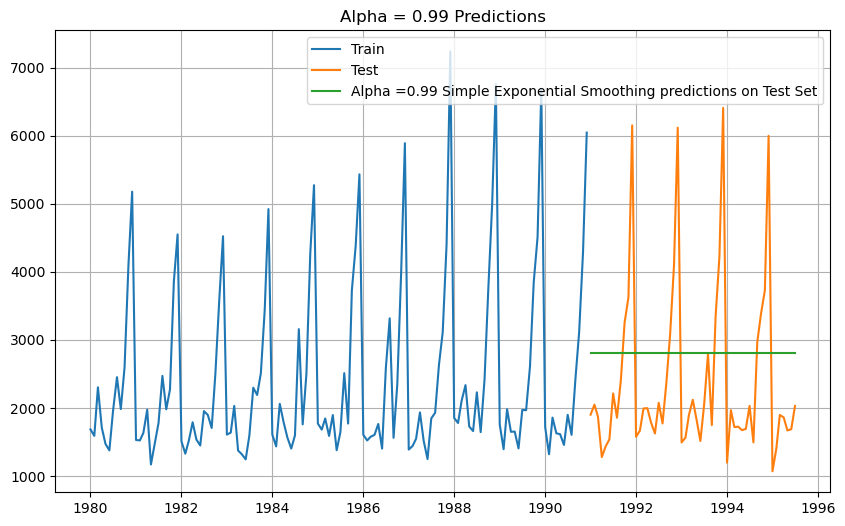

In [1092]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [1093]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [1094]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1338.0046232563645
SES RMSE (calculated using statsmodels): 1338.0046232563645


In [1095]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

Test RMSE
Alpha=0.99,SES  1338.004623

# Double Exponential Smoothing

In [1096]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6638769379750992, 'smoothing_trend': 9.966252219085015e-05, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.5681616946074, 'initial_trend': 29.018019327772173, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [1097]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-01    5330.498600
1991-02-01    5359.514827
1991-03-01    5388.531055
1991-04-01    5417.547282
1991-05-01    5446.563509
1991-06-01    5475.579737
1991-07-01    5504.595964
1991-08-01    5533.612192
1991-09-01    5562.628419
1991-10-01    5591.644646
1991-11-01    5620.660874
1991-12-01    5649.677101
1992-01-01    5678.693328
1992-02-01    5707.709556
1992-03-01    5736.725783
1992-04-01    5765.742011
1992-05-01    5794.758238
1992-06-01    5823.774465
1992-07-01    5852.790693
1992-08-01    5881.806920
1992-09-01    5910.823147
1992-10-01    5939.839375
1992-11-01    5968.855602
1992-12-01    5997.871830
1993-01-01    6026.888057
1993-02-01    6055.904284
1993-03-01    6084.920512
1993-04-01    6113.936739
1993-05-01    6142.952966
1993-06-01    6171.969194
1993-07-01    6200.985421
1993-08-01    6230.001648
1993-09-01    6259.017876
1993-10-01    6288.034103
1993-11-01    6317.050331
1993-12-01    6346.066558
1994-01-01    6375.082785
1994-02-01    6404.099013
1994-03-01  

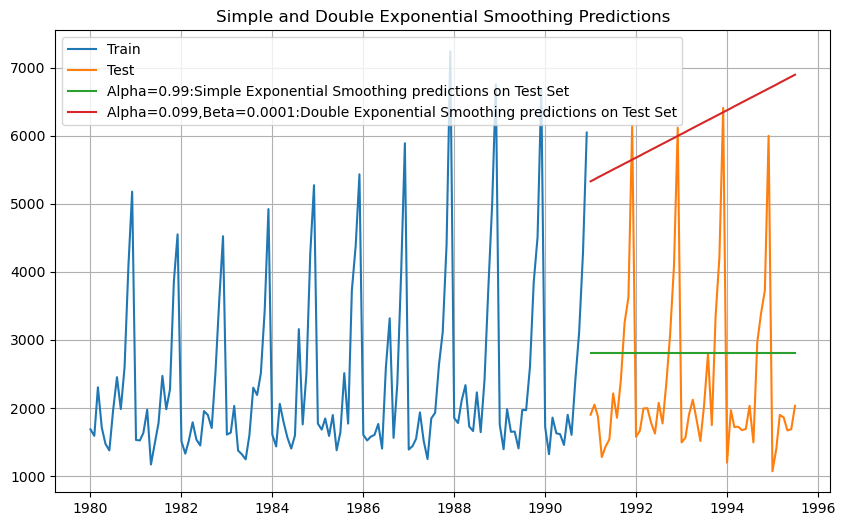

In [1098]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [1099]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 3949.9312976553306


In [1100]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha=0.99,SES           1338.004623
Alpha=1,Beta=0.0189:DES  3949.931298

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [1101]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.




==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1112722708441868, 'smoothing_trend': 0.012360804011805133, 'smoothing_seasonal': 0.4607176722812185, 'damping_trend': nan, 'initial_level': 2356.5780457745022, 'initial_trend': -0.10071063842436252, 'initial_seasons': array([-636.23320656, -722.98321108, -398.64408844, -473.43046147,
       -808.42474493, -815.34992566, -384.23070718,   72.99480164,
       -237.44227544,  272.32602348, 1541.37739846, 2590.07688887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [1102]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-01    1490.406418
1991-02-01    1204.529041
1991-03-01    1688.738437
1991-04-01    1551.230744
1991-05-01    1461.202870
1991-06-01    1278.652063
1991-07-01    1804.891340
1991-08-01    1678.961123
1991-09-01    2315.379595
1991-10-01    3224.983064
1991-11-01    4299.308651
1991-12-01    6410.721476
1992-01-01    1482.839506
1992-02-01    1196.962129
1992-03-01    1681.171525
1992-04-01    1543.663832
1992-05-01    1453.635958
1992-06-01    1271.085151
1992-07-01    1797.324428
1992-08-01    1671.394211
1992-09-01    2307.812683
1992-10-01    3217.416152
1992-11-01    4291.741739
1992-12-01    6403.154564
1993-01-01    1475.272594
1993-02-01    1189.395217
1993-03-01    1673.604613
1993-04-01    1536.096920
1993-05-01    1446.069046
1993-06-01    1263.518239
1993-07-01    1789.757516
1993-08-01    1663.827299
1993-09-01    2300.245771
1993-10-01    3209.849240
1993-11-01    4284.174827
1993-12-01    6395.587652
1994-01-01    1467.705682
1994-02-01    1181.828305
1994-03-01  

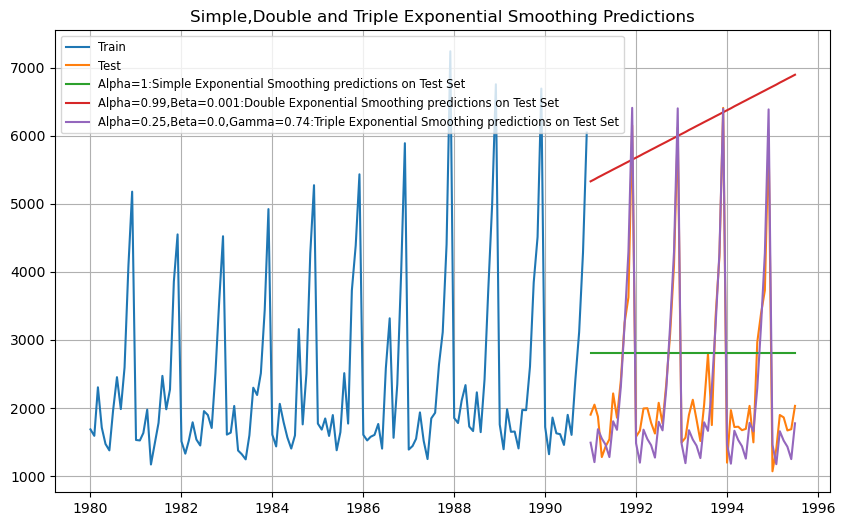

In [1103]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.legend(fontsize='small')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [1104]:
# We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [1105]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 378.9443254087722


In [1106]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf_mod = pd.concat([resultsDf, resultsDf_temp])
resultsDf_mod

Test RMSE
Alpha=0.99,SES                      1338.004623
Alpha=1,Beta=0.0189:DES             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES   378.944325

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method¶

In [1107]:
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.11104076314043171, 'smoothing_trend': 0.049348365324315684, 'smoothing_seasonal': 0.36232794311434374, 'damping_trend': nan, 'initial_level': 2356.510722747615, 'initial_trend': -9.729116859640436, 'initial_seasons': array([0.71251887, 0.6830697 , 0.90596553, 0.8058403 , 0.65605007,
       0.65424925, 0.88796426, 1.13391231, 0.91920101, 1.21223812,
       1.87074711, 2.37464156]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1108]:
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-01    1587.864666
1991-02-01    1356.648339
1991-03-01    1763.307702
1991-04-01    1656.501849
1991-05-01    1542.339421
1991-06-01    1355.430169
1991-07-01    1854.667549
1991-08-01    1820.739312
1991-09-01    2277.549303
1991-10-01    3122.952179
1991-11-01    4129.813914
1991-12-01    5892.688044
1992-01-01    1538.913349
1992-02-01    1314.717328
1992-03-01    1708.667011
1992-04-01    1605.037920
1992-05-01    1494.297894
1992-06-01    1313.100706
1992-07-01    1796.596002
1992-08-01    1763.580952
1992-09-01    2205.862797
1992-10-01    3024.397877
1992-11-01    3999.141364
1992-12-01    5705.742990
1993-01-01    1489.962032
1993-02-01    1272.786317
1993-03-01    1654.026319
1993-04-01    1553.573992
1993-05-01    1446.256366
1993-06-01    1270.771242
1993-07-01    1738.524455
1993-08-01    1706.422592
1993-09-01    2134.176290
1993-10-01    2925.843575
1993-11-01    3868.468815
1993-12-01    5518.797936
1994-01-01    1441.010715
1994-02-01    1230.855306
1994-03-01  

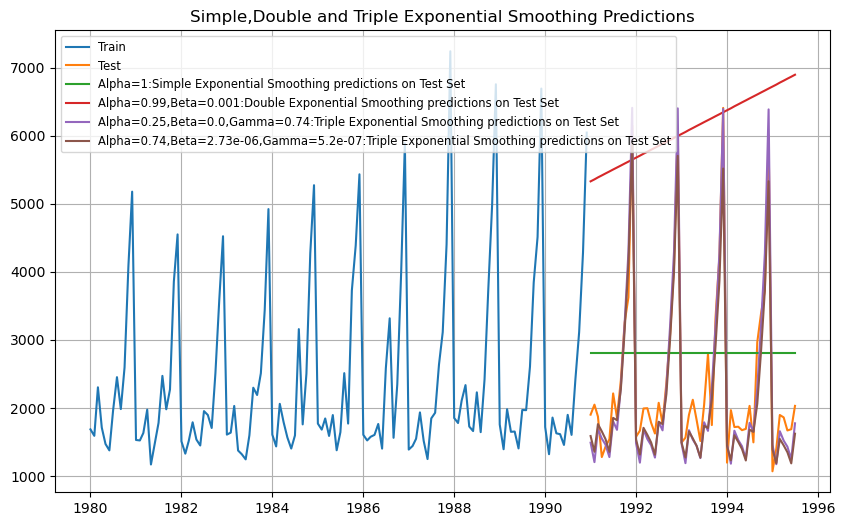

In [1109]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.legend(fontsize='small')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [1110]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 403.125867235564


In [1111]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf_f = pd.concat([resultsDf_mod, resultsDf_temp])
resultsDf_f

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867

# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression

In [1112]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [1113]:
# We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1114]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1115]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

First few rows of Test Data


Sparkling  time
YearMonth                  
1991-01-01       1902   256
1991-02-01       2049   257
1991-03-01       1874   258
1991-04-01       1279   259
1991-05-01       1432   260

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   306
1995-04-01       1862   307
1995-05-01       1670   308
1995-06-01       1688   309
1995-07-01       2031   310

In [1116]:
# Now that our training and test data has been modified, let us go ahead use LinearRegression to build the model on the training data and test the model on the test data.

In [1117]:
from sklearn.linear_model import LinearRegression

In [1118]:
lr = LinearRegression()

In [1119]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

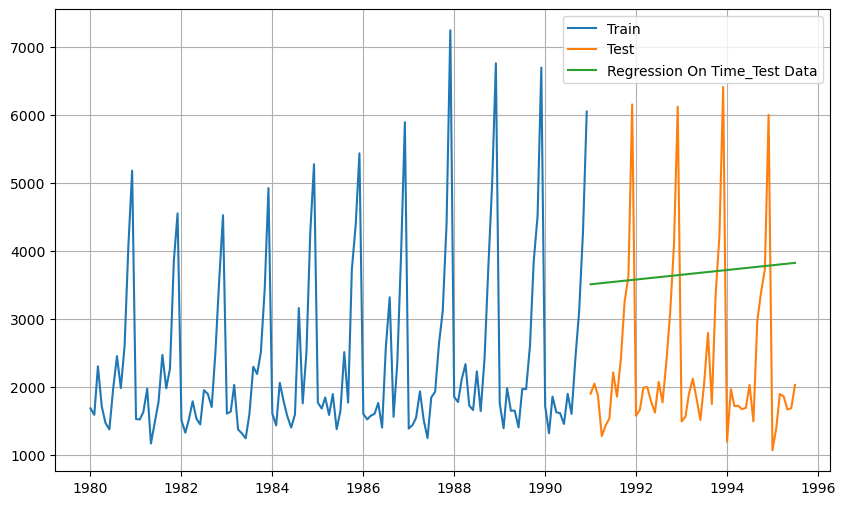

In [1120]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [1121]:
# Defining the functions for calculating the accuracy metrics.¶

In [1122]:
from sklearn import metrics

In [1123]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1798.201 


In [1124]:
resultsDf_LR = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf_LR

Test RMSE
RegressionOnTime  1798.2007

In [1125]:
resultsDf_f = pd.concat([resultsDf_f, resultsDf_temp])
resultsDf_f

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867

# Model 2: Naive Approach

In [1126]:
# For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [1127]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [1128]:
train.tail()

Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

In [1129]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

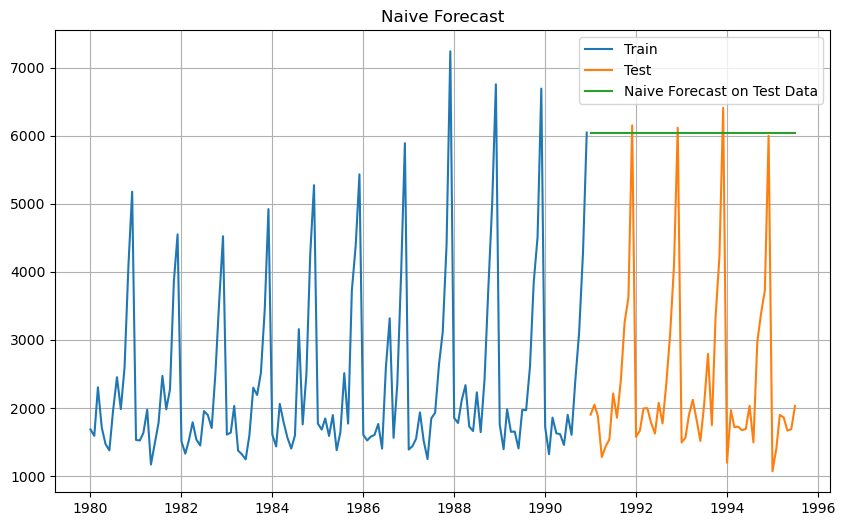

In [1130]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [1131]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [1132]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf_f, resultsDf_2])
resultsDf

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
NaiveModel                                          3864.279352

# Method 3: Simple Average

In [1133]:
# For this particular simple average method, we will forecast by using the average of the training values.

In [1134]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [1135]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
YearMonth                           
1991-01-01       1902    2403.780303
1991-02-01       2049    2403.780303
1991-03-01       1874    2403.780303
1991-04-01       1279    2403.780303
1991-05-01       1432    2403.780303

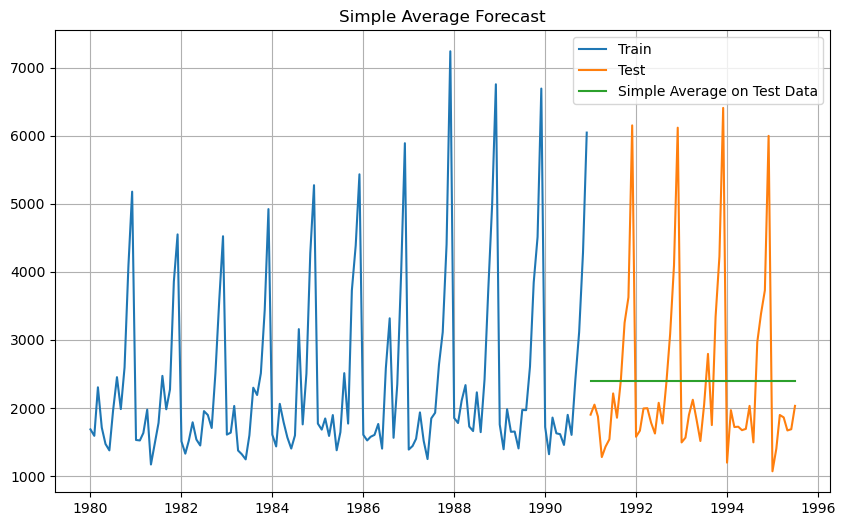

In [1136]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [1137]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [1138]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804

# Method 4: Moving Average(MA)

In [1139]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [1140]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

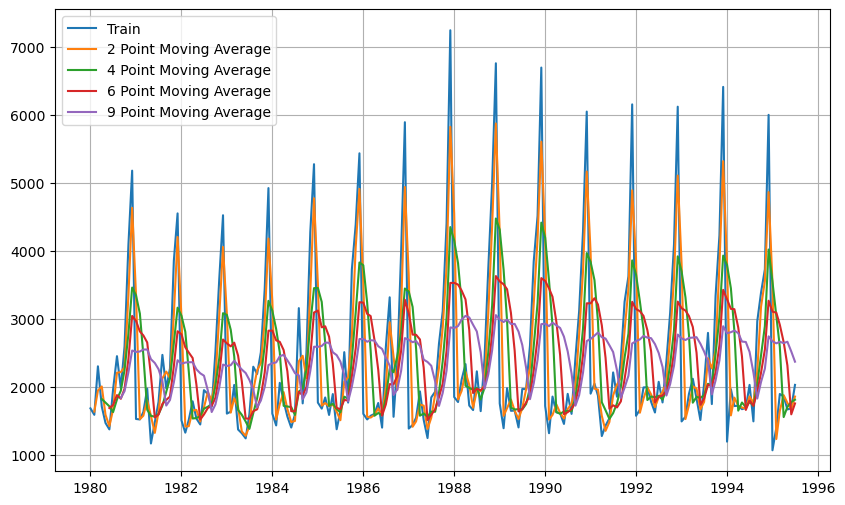

In [1141]:
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [1142]:
# Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [1143]:
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

In [1144]:
trailing_MovingAverage_train

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
...               ...         ...         ...          ...          ...
1990-06-01       1457      1536.0     1639.75  1600.000000  2739.222222
1990-07-01       1899      1678.0     1649.75  1629.833333  2523.000000
1990-08-01       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-01       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-01       3116      2770.0     2261.00  2019.333333  1880.444444

[130 rows x 5 columns]

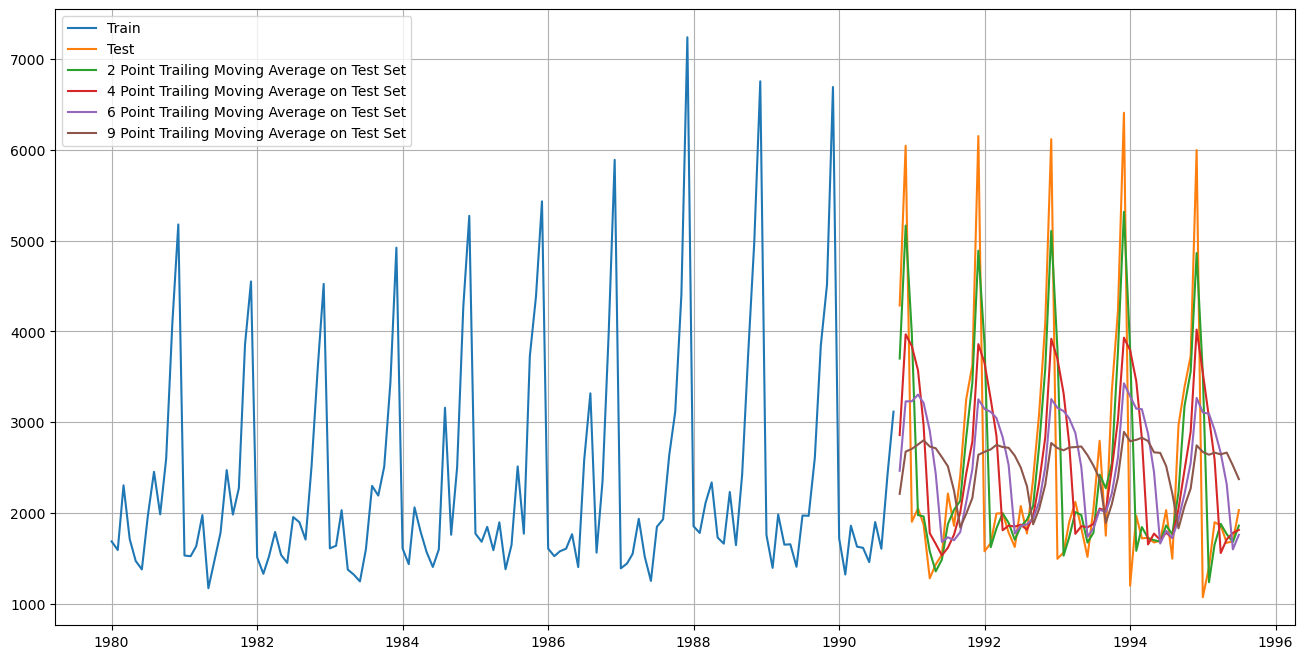

In [1145]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [1146]:
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

ValueError: Found input variables with inconsistent numbers of samples: [55, 57]

# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
sales_ts = df['Sparkling']

In [ ]:
dftest = adfuller(sales_ts)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

In [ ]:
# The p-value 0.60 is very large, and not smaller than 0.05 and thus is not a stationary series.

# Differencing 'd'

# Non differenced full data Time series

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Sparkling')

# Performing differencing ( d=1 ) as the data is non-stationary

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sparkling')

In [ ]:
# We observe seasonality even after differencing. Meaning the variance in the data seemss to be increasing.

# This suggests a log transformation of the data.

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Sparkling)')

In [ ]:
# We observe trend and seasonality even after taking log of the observations.

# Performing differencing (d=1) on the log transformed time series

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Sparkling)')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [ ]:
import itertools

In [ ]:
p= range(1,4)

In [ ]:
q = range(1, 4)

In [ ]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
pdq

In [ ]:
seasonal_pdq

In [ ]:
# Train test split

In [ ]:
df.head()

In [ ]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [ ]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

In [ ]:
# Using the log transformed series as there is variance in the data

In [ ]:
train_sales_ts_log = np.log10(train['Sparkling'])

In [ ]:
train_sales_ts_log

# ARIMA Model

In [ ]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

In [ ]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

In [ ]:
# Building ARIMA model with best parameters p,d,q

In [ ]:
best_model = ARIMA(train_sales_ts_log,order = (3,0,3))
best_results = best_model.fit()

In [ ]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

In [ ]:
# Calculating RMSE for best ARIMA model

In [ ]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [ ]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [ ]:
pred99 = best_results.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [ ]:
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy1 = test.copy()
testCopy1['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [ ]:
mse = ((testCopy1['Sparkling'] - testCopy1['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

In [ ]:
axis = train['Sparkling'].plot(label='Sparkling Sales', figsize=(10, 6))
testCopy1['Sparkling'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy1['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()
plt.close()

In [ ]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

In [ ]:
resultsDf = pd.concat([resultsDf, resultsDf_3, resultsDf2])
resultsDf

# SARIMA Model

In [ ]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(train['Sparkling'],alpha=0.05);

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

In [ ]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

In [ ]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

In [ ]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

In [ ]:
SARIMA_AIC.sort_values(by=['AIC']).head()

In [ ]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

In [ ]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [ ]:
# ## Predict on the Test Set using this model and evaluate the model.

In [ ]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [ ]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

In [ ]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

# 7.Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

# 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

In [ ]:
results_full_data_model.plot_diagnostics();

In [ ]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=17)

In [ ]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

In [ ]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

In [ ]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-12-31', freq='M'))

In [ ]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling Sales')
plt.legend(loc='best')
plt.show()

In [ ]:
df2 = pd.read_csv("~chetandeshpande/Downloads/download-25.csv", parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [ ]:
df2.head()

In [ ]:
rcParams['figure.figsize'] = 10, 6
df2.plot()
plt.show()

# ROSE

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
df2.info()

In [ ]:
df2.describe()

In [ ]:
df2.isnull().sum()

In [ ]:
df2['Rose'].fillna(method='ffill', inplace=True)

In [ ]:
df2.isnull().sum()

In [ ]:
rcParams['figure.figsize'] = 10, 6
df2.plot()
plt.show()

# Yearly Boxplot

In [ ]:
sns.boxplot(x = df2.index.year,y = df2['Rose'])
plt.grid();

# Monthly Plot

In [ ]:
sns.boxplot(x = df2.index.month_name(),y = df2['Rose'])
plt.grid();

# Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

In [ ]:
from statsmodels.graphics.tsaplots import month_plot

In [ ]:
month_plot(df2['Rose'], ylabel='Sales')
plt.grid();

# Plot a graph of monthly RetailSales across years.

In [ ]:
monthly_sales_across_years = pd.pivot_table(df2, values = 'Rose', columns = df2.index.month, index = df2.index.year)
monthly_sales_across_years

In [ ]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

# Plot the Empirical Cumulative Distribution.

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df2['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

In [ ]:
# This particular graph tells us what percentage of data points refer to what number of Sales.

# Plot the average RetailSales per month and the month on month percentage change of RetailSales.

In [ ]:
average    = df2.groupby(df2.index)["Rose"].mean()
pct_change = df2.groupby(df2.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

# Decompose the Time Series and plot the different components.

In [ ]:
decomposition = seasonal_decompose(df2['Rose'],model='additive')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

In [ ]:
decomposition = seasonal_decompose(df2['Rose'],model='multiplicative')
decomposition.plot();

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

# 3. Split the data into training and test. The test data should start in 1991.

In [ ]:
df2.shape

In [ ]:
df2.head()

In [ ]:
df2.tail()

In [ ]:
train2 = df2[df2.index.year < 1991]
test2 = df2[df2.index.year >= 1991]

In [ ]:
train2.shape

In [ ]:
test2.shape

In [ ]:
print('First few rows of Training Data')
display(train2.head())
print('Last few rows of Training Data')
display(train2.tail())
print('First few rows of Test Data')
display(test2.head())
print('Last few rows of Test Data')
display(test2.tail())

In [ ]:
train2['Rose'].plot(fontsize=14)
test2['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

In [1147]:
model_SES2 = SimpleExpSmoothing(train2,initialization_method='estimated')

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1148]:
model_SES2_autofit = model_SES2.fit(optimized=True)

In [1149]:
model_SES2_autofit.params

{'smoothing_level': 0.09874984903268463,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869689447322,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [1150]:
SES_predict2 = model_SES2_autofit.forecast(steps=len(test2))
SES_predict2

1991-01-01    87.104998
1991-02-01    87.104998
1991-03-01    87.104998
1991-04-01    87.104998
1991-05-01    87.104998
1991-06-01    87.104998
1991-07-01    87.104998
1991-08-01    87.104998
1991-09-01    87.104998
1991-10-01    87.104998
1991-11-01    87.104998
1991-12-01    87.104998
1992-01-01    87.104998
1992-02-01    87.104998
1992-03-01    87.104998
1992-04-01    87.104998
1992-05-01    87.104998
1992-06-01    87.104998
1992-07-01    87.104998
1992-08-01    87.104998
1992-09-01    87.104998
1992-10-01    87.104998
1992-11-01    87.104998
1992-12-01    87.104998
1993-01-01    87.104998
1993-02-01    87.104998
1993-03-01    87.104998
1993-04-01    87.104998
1993-05-01    87.104998
1993-06-01    87.104998
1993-07-01    87.104998
1993-08-01    87.104998
1993-09-01    87.104998
1993-10-01    87.104998
1993-11-01    87.104998
1993-12-01    87.104998
1994-01-01    87.104998
1994-02-01    87.104998
1994-03-01    87.104998
1994-04-01    87.104998
1994-05-01    87.104998
1994-06-01    87

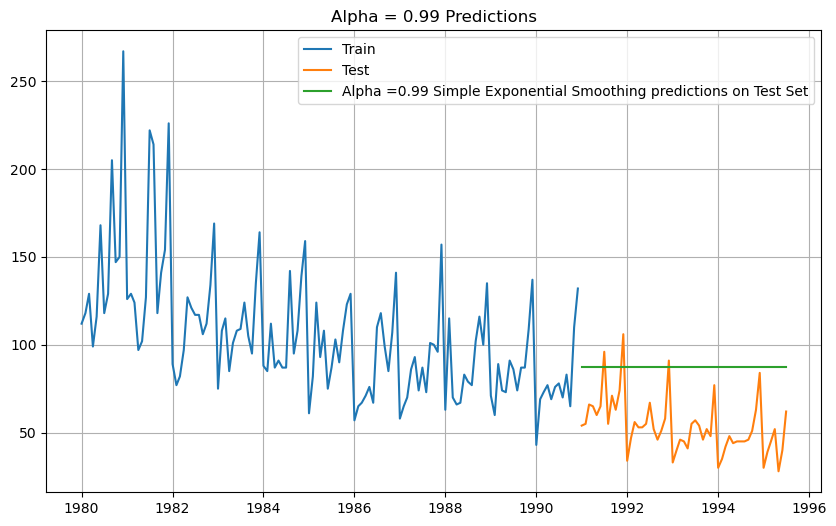

In [1151]:
plt.plot(train2, label='Train')
plt.plot(test2, label='Test')

plt.plot(SES_predict2, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [1152]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [1153]:
print('SES RMSE:',mean_squared_error(test2.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test2.values,SES_predict.values)[0])

SES RMSE: 2750.8715511814835
SES RMSE (calculated using statsmodels): 2750.8715511814826


In [1154]:
resultsDf2 = pd.DataFrame({'Test RMSE': [em.rmse(test2.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf2

Test RMSE
Alpha=0.99,SES  2750.871551

# Double Exponential Smoothing

In [1155]:
# Initializing the Double Exponential Smoothing Model
model_DES2 = Holt(train2,initialization_method='estimated')
# Fitting the model
model_DES2 = model_DES2.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES2.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.8155475230004, 'initial_trend': -0.4943783477354779, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1156]:
DES_predict2 =  model_DES2.forecast(len(test2))
DES_predict2

1991-01-01    72.063227
1991-02-01    71.568849
1991-03-01    71.074471
1991-04-01    70.580092
1991-05-01    70.085714
1991-06-01    69.591336
1991-07-01    69.096957
1991-08-01    68.602579
1991-09-01    68.108200
1991-10-01    67.613822
1991-11-01    67.119444
1991-12-01    66.625065
1992-01-01    66.130687
1992-02-01    65.636309
1992-03-01    65.141930
1992-04-01    64.647552
1992-05-01    64.153174
1992-06-01    63.658795
1992-07-01    63.164417
1992-08-01    62.670039
1992-09-01    62.175660
1992-10-01    61.681282
1992-11-01    61.186904
1992-12-01    60.692525
1993-01-01    60.198147
1993-02-01    59.703769
1993-03-01    59.209390
1993-04-01    58.715012
1993-05-01    58.220634
1993-06-01    57.726255
1993-07-01    57.231877
1993-08-01    56.737498
1993-09-01    56.243120
1993-10-01    55.748742
1993-11-01    55.254363
1993-12-01    54.759985
1994-01-01    54.265607
1994-02-01    53.771228
1994-03-01    53.276850
1994-04-01    52.782472
1994-05-01    52.288093
1994-06-01    51

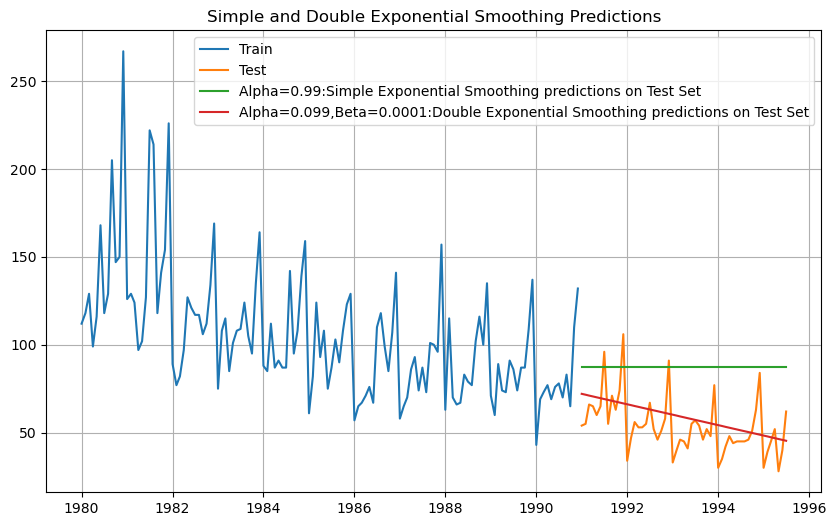

In [1157]:
plt.plot(train2, label='Train')
plt.plot(test2, label='Test')

plt.plot(SES_predict2, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict2, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [1158]:
print('DES RMSE:',mean_squared_error(test2.values,DES_predict2.values,squared=False))

DES RMSE: 15.275715668630216


In [1159]:
resultsDf_temp2 = pd.DataFrame({'Test RMSE': [mean_squared_error(test2.values,DES_predict2.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf2 = pd.concat([resultsDf2, resultsDf_temp2])
resultsDf2

Test RMSE
Alpha=0.99,SES           2750.871551
Alpha=1,Beta=0.0189:DES    15.275716

# Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [1160]:
model_TES2 = ExponentialSmoothing(train2,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES2 = model_TES2.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.1112722708441868, 'smoothing_trend': 0.012360804011805133, 'smoothing_seasonal': 0.4607176722812185, 'damping_trend': nan, 'initial_level': 2356.5780457745022, 'initial_trend': -0.10071063842436252, 'initial_seasons': array([-636.23320656, -722.98321108, -398.64408844, -473.43046147,
       -808.42474493, -815.34992566, -384.23070718,   72.99480164,
       -237.44227544,  272.32602348, 1541.37739846, 2590.07688887]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1161]:
TES_predict2 =  model_TES2.forecast(len(test))
TES_predict2

1991-01-01     42.615473
1991-02-01     54.496368
1991-03-01     61.950485
1991-04-01     50.696607
1991-05-01     58.868607
1991-06-01     63.728611
1991-07-01     73.129188
1991-08-01     78.628877
1991-09-01     74.227253
1991-10-01     71.784789
1991-11-01     89.327067
1991-12-01    131.291115
1992-01-01     36.020814
1992-02-01     47.901709
1992-03-01     55.355826
1992-04-01     44.101948
1992-05-01     52.273948
1992-06-01     57.133952
1992-07-01     66.534529
1992-08-01     72.034218
1992-09-01     67.632594
1992-10-01     65.190130
1992-11-01     82.732408
1992-12-01    124.696456
1993-01-01     29.426155
1993-02-01     41.307050
1993-03-01     48.761167
1993-04-01     37.507289
1993-05-01     45.679289
1993-06-01     50.539292
1993-07-01     59.939870
1993-08-01     65.439559
1993-09-01     61.037935
1993-10-01     58.595470
1993-11-01     76.137748
1993-12-01    118.101796
1994-01-01     22.831496
1994-02-01     34.712390
1994-03-01     42.166507
1994-04-01     30.912629


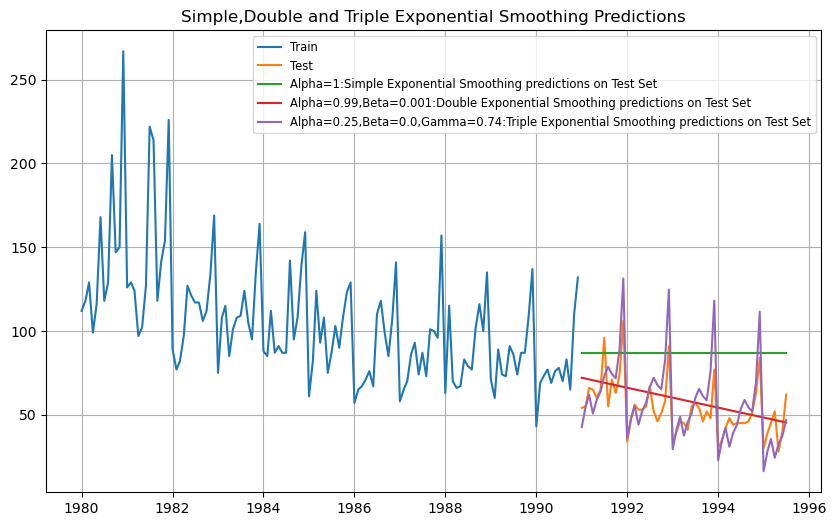

In [1162]:
plt.plot(train2, label='Train')
plt.plot(test2, label='Test')

plt.plot(SES_predict2, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict2, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict2, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.legend(fontsize='small')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [1163]:
# We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [1164]:
print('TES RMSE:',mean_squared_error(test2.values,TES_predict.values,squared=False))

TES RMSE: 2609.434669404991


In [1165]:
resultsDf_temp2 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf_mod2 = pd.concat([resultsDf2, resultsDf_temp2])
resultsDf_mod2

Test RMSE
Alpha=0.99,SES                      2750.871551
Alpha=1,Beta=0.0189:DES               15.275716
Alpha=0.25,Beta=0.0,Gamma=0.74:TES   378.944325

# Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [1166]:
model_TES_am2 = ExponentialSmoothing(train2,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am2 = model_TES_am2.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am2.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.06621892536991639, 'smoothing_trend': 0.05130241597404643, 'smoothing_seasonal': 2.6732907021486167e-07, 'damping_trend': nan, 'initial_level': 126.39721935732165, 'initial_trend': -0.7794874071912484, 'initial_seasons': array([0.89177529, 1.01159891, 1.1054501 , 0.96614341, 1.08623824,
       1.18412446, 1.3017767 , 1.38469327, 1.31294464, 1.28483844,
       1.49775256, 2.06558486]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [1167]:
TES_predict_am2 =  model_TES_am2.forecast(len(test))
TES_predict_am2

1991-01-01     56.665453
1991-02-01     64.085515
1991-03-01     69.819256
1991-04-01     60.835667
1991-05-01     68.189618
1991-06-01     74.107635
1991-07-01     81.221411
1991-08-01     86.129502
1991-09-01     81.415112
1991-10-01     79.426094
1991-11-01     92.301055
1991-12-01    126.898730
1992-01-01     54.615152
1992-02-01     61.759724
1992-03-01     67.277690
1992-04-01     58.614384
1992-05-01     65.692223
1992-06-01     71.385187
1992-07-01     78.228467
1992-08-01     82.945923
1992-09-01     78.396491
1992-10-01     76.472093
1992-11-01     88.857537
1992-12-01    122.149697
1993-01-01     52.564851
1993-02-01     59.433934
1993-03-01     64.736124
1993-04-01     56.393101
1993-05-01     63.194827
1993-06-01     68.662740
1993-07-01     75.235522
1993-08-01     79.762343
1993-09-01     75.377870
1993-10-01     73.518091
1993-11-01     85.414020
1993-12-01    117.400664
1994-01-01     50.514550
1994-02-01     57.108143
1994-03-01     62.194559
1994-04-01     54.171818


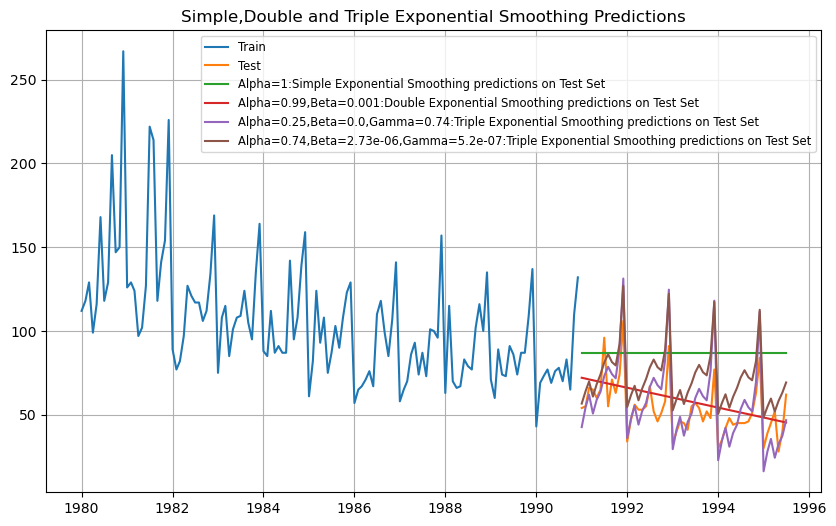

In [1168]:
plt.plot(train2, label='Train')
plt.plot(test2, label='Test')

plt.plot(SES_predict2, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict2, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict2, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am2, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.legend(fontsize='small')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [1169]:
print('TES_am RMSE:',mean_squared_error(test2.values,TES_predict_am2.values,squared=False))

TES_am RMSE: 20.975570880315125


In [1170]:
resultsDf_temp2 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf_f2 = pd.concat([resultsDf_mod2, resultsDf_temp2])
resultsDf_f2

Test RMSE
Alpha=0.99,SES                                      2750.871551
Alpha=1,Beta=0.0189:DES                               15.275716
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867

# Building different models and comparing the accuracy metrics.

# Model 1: Linear Regression

In [1171]:
train_time2 = [i+1 for i in range(len(train2))]
test_time2 = [i+256 for i in range(len(test2))]
print('Training Time instance','\n',train_time2)
print('Test Time instance','\n',test_time2)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


In [1172]:
# We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1173]:
LinearRegression_train2 = train2.copy()
LinearRegression_test2 = test2.copy()

In [1174]:
LinearRegression_train2['time2'] = train_time2
LinearRegression_test2['time2'] = test_time2

print('First few rows of Training Data')
display(LinearRegression_train2.head())
print('Last few rows of Training Data')
display(LinearRegression_train2.tail())
print('First few rows of Test Data')
display(LinearRegression_test2.head())
print('Last few rows of Test Data')
display(LinearRegression_test2.tail())

First few rows of Training Data


Rose  time2
YearMonth               
1980-01-01  112.0      1
1980-02-01  118.0      2
1980-03-01  129.0      3
1980-04-01   99.0      4
1980-05-01  116.0      5

Last few rows of Training Data


Rose  time2
YearMonth               
1990-08-01   70.0    128
1990-09-01   83.0    129
1990-10-01   65.0    130
1990-11-01  110.0    131
1990-12-01  132.0    132

First few rows of Test Data


Rose  time2
YearMonth              
1991-01-01  54.0    256
1991-02-01  55.0    257
1991-03-01  66.0    258
1991-04-01  65.0    259
1991-05-01  60.0    260

Last few rows of Test Data


Rose  time2
YearMonth              
1995-03-01  45.0    306
1995-04-01  52.0    307
1995-05-01  28.0    308
1995-06-01  40.0    309
1995-07-01  62.0    310

In [1175]:
# Now that our training and test data has been modified, let us go ahead use LinearRegression to build the model on the training data and test the model on the test data.

In [1176]:
from sklearn.linear_model import LinearRegression

In [1177]:
lr2 = LinearRegression()

In [1178]:
lr2.fit(LinearRegression_train2[['time2']],LinearRegression_train2['Rose'])

LinearRegression()

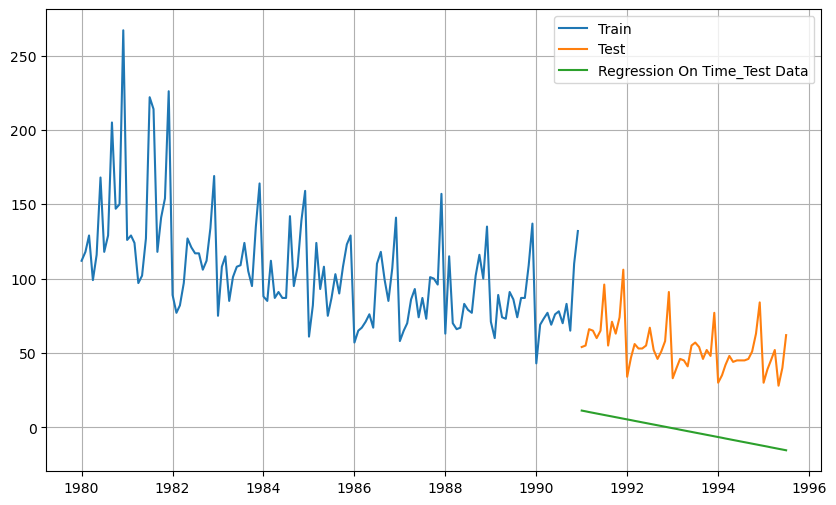

In [1179]:
train_predictions_model2 = lr2.predict(LinearRegression_train2[['time2']])
LinearRegression_train2['RegOnTime'] = train_predictions_model2

test_predictions_model2 = lr2.predict(LinearRegression_test2[['time2']])
LinearRegression_test2['RegOnTime'] = test_predictions_model2

plt.plot( train2['Rose'], label='Train')
plt.plot(test2['Rose'], label='Test')
plt.plot(LinearRegression_test2['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

In [1180]:
# Defining the functions for calculating the accuracy metrics.¶

In [1181]:
from sklearn import metrics

In [1182]:
rmse_model1_test2 = metrics.mean_squared_error(test2['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test2))

For RegressionOnTime forecast on the Test Data,  RMSE is 57.773 


In [1183]:
resultsDf_LR2 = pd.DataFrame({'Test RMSE': [rmse_model1_test2]},index=['RegressionOnTime'])
resultsDf_LR2

Test RMSE
RegressionOnTime  57.772711

In [1184]:
resultsDf_f2 = pd.concat([resultsDf_f,resultsDf_LR2, resultsDf_temp2])
resultsDf_f2

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
RegressionOnTime                                      57.772711
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867

# Model 2: Naive Approach

In [1185]:
NaiveModel_train2 = train2.copy()
NaiveModel_test2 = test2.copy()

In [1186]:
train2.tail()

Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

In [1187]:
NaiveModel_test2['naive'] = np.asarray(train2['Rose'])[len(np.asarray(train2['Rose']))-1]
NaiveModel_test2['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

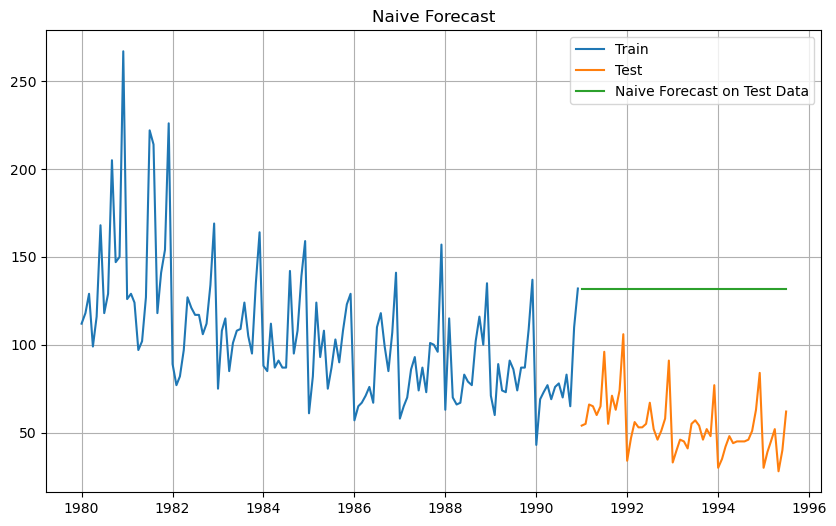

In [1188]:
plt.plot(NaiveModel_train2['Rose'], label='Train')
plt.plot(test2['Rose'], label='Test')

plt.plot(NaiveModel_test2['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

# Model Evaluation

In [1189]:
rmse_model2_test2 = metrics.mean_squared_error(test2['Rose'],NaiveModel_test2['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test2))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.739


In [1190]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf2 = pd.concat([resultsDf_f2, resultsDf_2])
resultsDf2

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
RegressionOnTime                                      57.772711
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
NaiveModel                                          3864.279352

# Method 3: Simple Average

In [1191]:
SimpleAverage_train2 = train2.copy()
SimpleAverage_test2 = test2.copy()

In [1192]:
SimpleAverage_test2['mean_forecast'] = train2['Rose'].mean()
SimpleAverage_test2.head()

Rose  mean_forecast
YearMonth                      
1991-01-01  54.0     104.939394
1991-02-01  55.0     104.939394
1991-03-01  66.0     104.939394
1991-04-01  65.0     104.939394
1991-05-01  60.0     104.939394

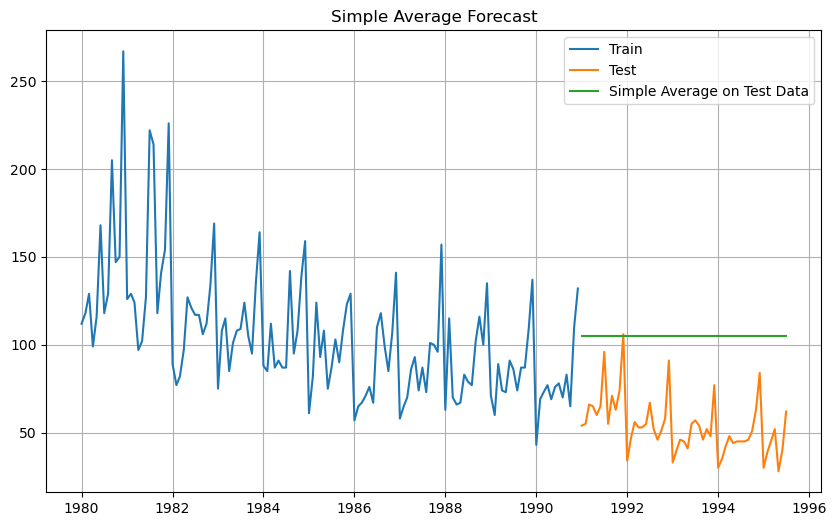

In [1193]:
plt.plot(SimpleAverage_train2['Rose'], label='Train')
plt.plot(SimpleAverage_test2['Rose'], label='Test')

plt.plot(SimpleAverage_test2['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

# Model Evaluation

In [1194]:
rmse_model3_test2 = metrics.mean_squared_error(test2['Rose'],SimpleAverage_test2['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test2))

For Simple Average forecast on the Test Data,  RMSE is 53.481


In [1195]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf2, resultsDf_3])
resultsDf

Test RMSE
Alpha=0.99,SES                                      1338.004623
Alpha=1,Beta=0.0189:DES                             3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
RegressionOnTime                                      57.772711
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867
NaiveModel                                          3864.279352
SimpleAverageModel                                  1275.081804

# Method 4: Moving Average(MA)

In [1196]:
MovingAverage2 = df2.copy()
MovingAverage2.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [1197]:
MovingAverage2['Trailing_2'] = MovingAverage2['Rose'].rolling(2).mean()
MovingAverage2['Trailing_4'] = MovingAverage2['Rose'].rolling(4).mean()
MovingAverage2['Trailing_6'] = MovingAverage2['Rose'].rolling(6).mean()
MovingAverage2['Trailing_9'] = MovingAverage2['Rose'].rolling(9).mean()

MovingAverage2.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

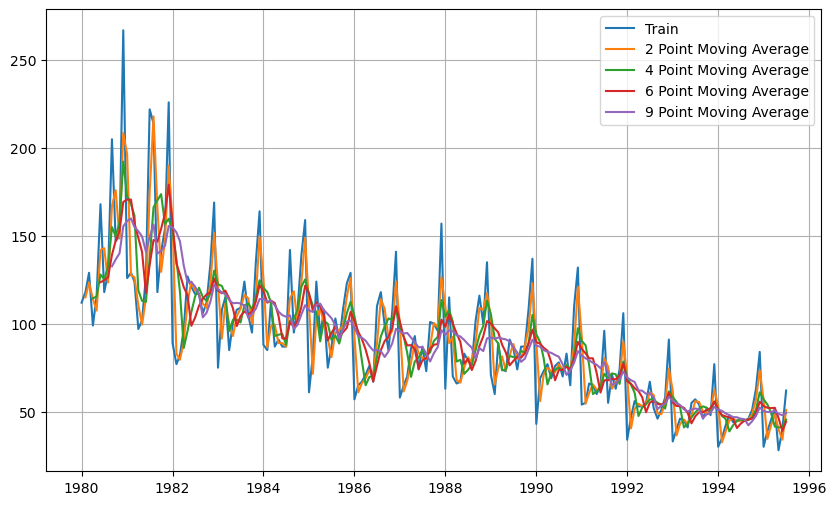

In [1198]:
plt.plot(MovingAverage2['Rose'], label='Train')
plt.plot(MovingAverage2['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage2['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage2['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage2['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [1199]:
trailing_MovingAverage_train2 = MovingAverage2[0:int(len(MovingAverage2)*0.7)] 
trailing_MovingAverage_test2 = MovingAverage2[int(len(MovingAverage2)*0.7):]

In [1200]:
trailing_MovingAverage_train

Sparkling  Trailing_2  Trailing_4   Trailing_6   Trailing_9
YearMonth                                                              
1980-01-01       1686         NaN         NaN          NaN          NaN
1980-02-01       1591      1638.5         NaN          NaN          NaN
1980-03-01       2304      1947.5         NaN          NaN          NaN
1980-04-01       1712      2008.0     1823.25          NaN          NaN
1980-05-01       1471      1591.5     1769.50          NaN          NaN
...               ...         ...         ...          ...          ...
1990-06-01       1457      1536.0     1639.75  1600.000000  2739.222222
1990-07-01       1899      1678.0     1649.75  1629.833333  2523.000000
1990-08-01       1605      1752.0     1644.00  1677.166667  2199.777778
1990-09-01       2424      2014.5     1846.25  1771.333333  1725.333333
1990-10-01       3116      2770.0     2261.00  2019.333333  1880.444444

[130 rows x 5 columns]

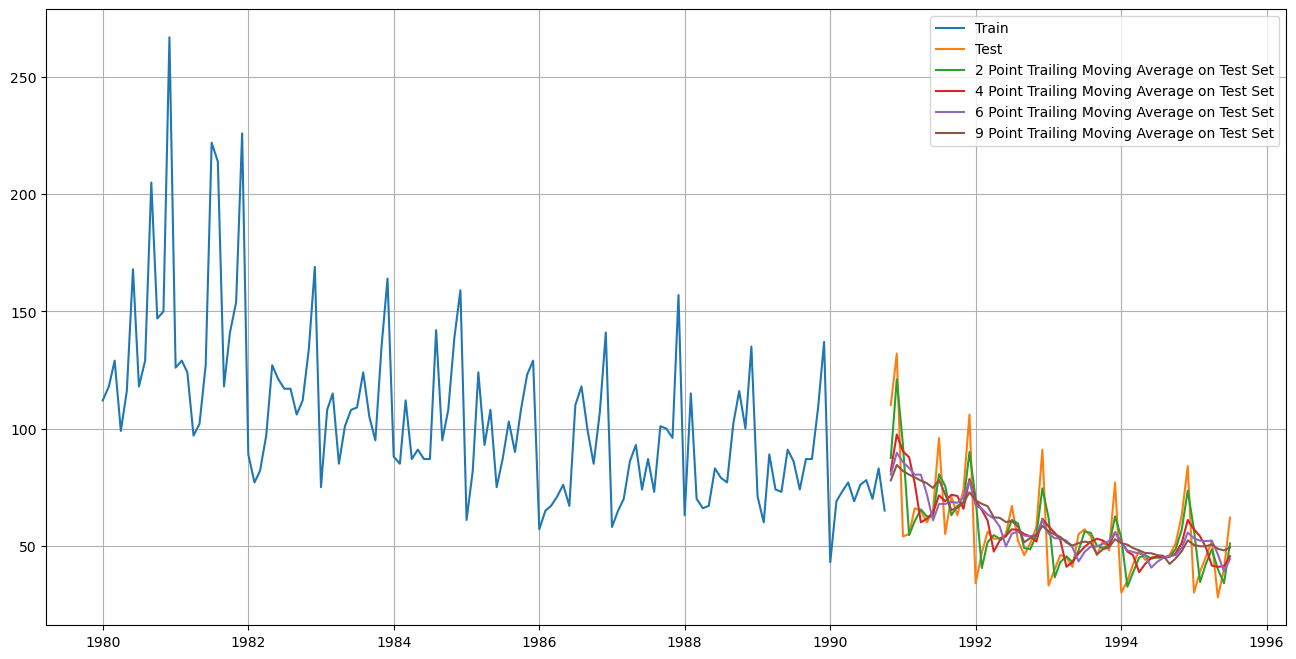

In [1201]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train2['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test2['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test2['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test2['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test2['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test2['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

# Model Evaluation

In [1202]:
rmse_model4_test2_2 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test2_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test2_4 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test2_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test2_6 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test2_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test2_9 = metrics.mean_squared_error(test2['Rose'],trailing_MovingAverage_test2['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test2_9))

ValueError: Found input variables with inconsistent numbers of samples: [55, 57]

# # 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [1203]:
from statsmodels.tsa.stattools import adfuller

In [1204]:
sales_ts2 = df2['Rose']

In [1205]:
dftest2 = adfuller(sales_ts2)#python implementation of dicky fuller test 
dftest2
print('DF test statistic is %3.3f' %dftest2[0])
print('DF test p-value is %1.4f' %dftest2[1])

DF test statistic is -1.875
DF test p-value is 0.3440


In [1206]:
# The p-value 0.60 is very large, and not smaller than 0.05 and thus is not a stationary series.

# Differencing 'd'

# Non differenced full data Time series

Text(0, 0.5, 'Rose')

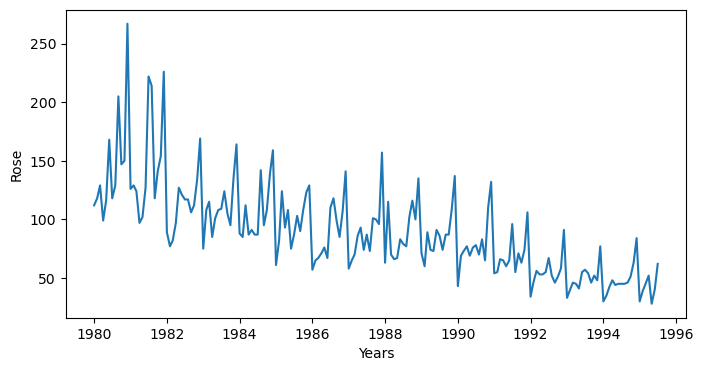

In [1207]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts2)
plt.xlabel('Years')
plt.ylabel('Rose')

# Performing differencing ( d=1 ) as the data is non-stationary

Text(0, 0.5, 'Rose')

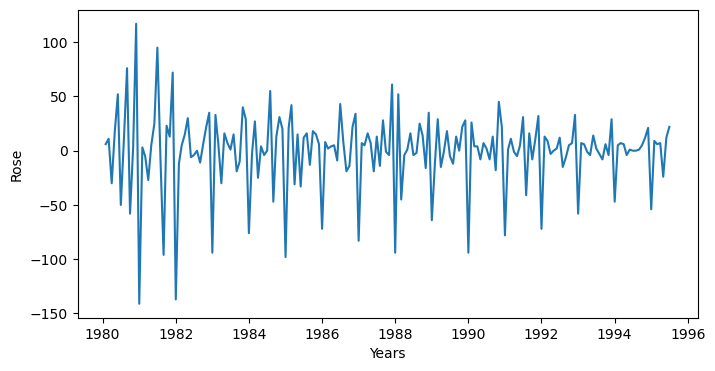

In [1208]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts2.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Rose')

In [1209]:
# We observe seasonality even after differencing. Meaning the variance in the data seemss to be increasing.

# This suggests a log transformation of the data.

Text(0, 0.5, 'Log (Rose)')

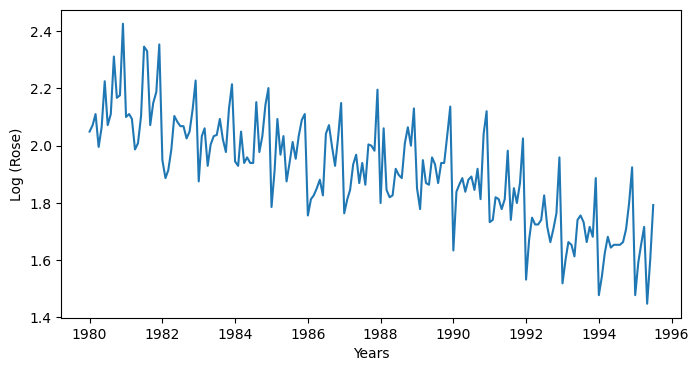

In [1210]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts2))
plt.xlabel('Years')
plt.ylabel('Log (Rose)')

In [1211]:
# We observe trend and seasonality even after taking log of the observations.

# Performing differencing (d=1) on the log transformed time series

Text(0, 0.5, 'Differenced Log (Rose)')

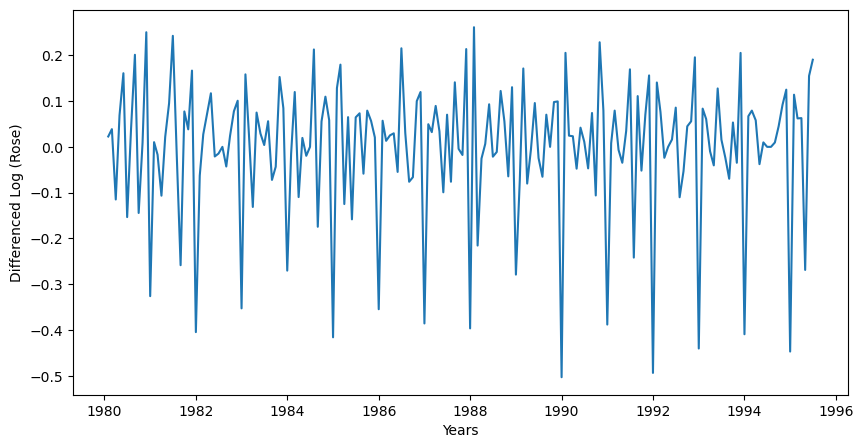

In [1212]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts2).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Rose)')

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [1213]:
import itertools

In [1214]:
p= range(1,4)

In [1215]:
q = range(1, 4)

In [1216]:
d= range(0,2)

#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq2 = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq2 = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [1217]:
#Generate all different combinations of p, d and q triplets for ARIMA model building 
pdq2 = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq2 = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [1218]:
pdq2

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [1219]:
seasonal_pdq2

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [1220]:
train2.shape

(132, 1)

In [1221]:
test2.shape

(55, 1)

In [1222]:
dftest = adfuller(train2['Rose'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest2[0])
print('DF test p-value is %1.4f' %dftest2[1])

DF test statistic is -1.875
DF test p-value is 0.3440


In [1223]:
# Using the log transformed series as there is variance in the data

In [1224]:
train_sales_ts_log2 = np.log10(train2['Rose'])

In [1225]:
train_sales_ts_log2

YearMonth
1980-01-01    2.049218
1980-02-01    2.071882
1980-03-01    2.110590
1980-04-01    1.995635
1980-05-01    2.064458
                ...   
1990-08-01    1.845098
1990-09-01    1.919078
1990-10-01    1.812913
1990-11-01    2.041393
1990-12-01    2.120574
Name: Rose, Length: 132, dtype: float64

# ARIMA Model

In [1226]:
ARIMA_AIC2 = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC2

Empty DataFrame
Columns: [param, AIC]
Index: []

In [1227]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model2 = ARIMA(train_sales_ts_log2,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model2.aic))
    ARIMA_AIC2 = ARIMA_AIC2.append({'param':param, 'AIC': ARIMA_model2.aic}, ignore_index=True)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2570327139.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:47

ARIMA(0, 1, 0) - AIC:-134.29308634573192
ARIMA(0, 1, 1) - AIC:-184.0250505981133
ARIMA(0, 1, 2) - AIC:-186.8032487184047
ARIMA(1, 1, 0) - AIC:-150.6792926264808
ARIMA(1, 1, 1) - AIC:-186.10111856862653
ARIMA(1, 1, 2) - AIC:-186.19506535192224
ARIMA(2, 1, 0) - AIC:-166.1062937540716
ARIMA(2, 1, 1) - AIC:-184.8291748008063


/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2570327139.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2570327139.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.9/site-pack

ARIMA(2, 1, 2) - AIC:-184.32051139884322


/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2570327139.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [1228]:
ARIMA_AIC2.sort_values(by='AIC',ascending=True).head()

param         AIC
2  (0, 1, 2) -186.803249
5  (1, 1, 2) -186.195065
4  (1, 1, 1) -186.101119
7  (2, 1, 1) -184.829175
8  (2, 1, 2) -184.320511

In [1229]:
# Building ARIMA model with best parameters p,d,q

In [1230]:
best_model2 = ARIMA(train_sales_ts_log2,order = (3,0,3))
best_results2 = best_model2.fit()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [1231]:
print(best_results2.summary().tables[0])
print(best_results2.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 0, 3)   Log Likelihood                  98.381
Date:                Sat, 30 Sep 2023   AIC                           -180.762
Time:                        23:19:02   BIC                           -157.700
Sample:                    01-01-1980   HQIC                          -171.391
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0114      0.105     19.178      0.000       1.806       2.217
ar.L1         -0.1874      4.111     -0.046      0.964      -8.244       7.869
ar.L2          0.7941      1.976      0.402      0.6

In [1232]:
# Calculating RMSE for best ARIMA model

In [1233]:
pred_dynamic2 = best_results2.get_prediction(start=pd.to_datetime('1991-01-01'), dynamic=True, full_results=True)

In [1234]:
pred91 = best_results2.get_forecast(steps=len(test), alpha=0.1)#forecasting values 

In [1235]:
sales_ts_forecasted2 = pred_dynamic2.predicted_mean
testCopy2 = test2.copy()
testCopy2['sales_ts_forecasted2'] = np.power(10, pred91.predicted_mean)

In [1236]:
mse2 = ((testCopy2['Rose'] - testCopy2['sales_ts_forecasted2']) ** 2).mean()
rmse2 = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 27.394


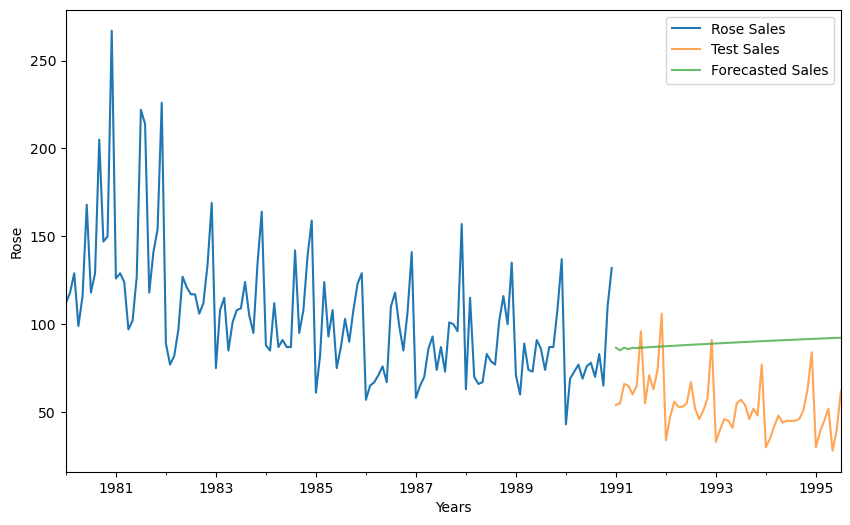

In [1237]:
axis = train2['Rose'].plot(label='Rose Sales', figsize=(10, 6))
testCopy2['Rose'].plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy2['sales_ts_forecasted2'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

In [1238]:
resultsDf2 = pd.DataFrame({'RMSE': rmse}
                           ,index=['Best ARIMA Model : ARIMA(3,0,3)'])

resultsDf2 = pd.concat([resultsDf, resultsDf_3, resultsDf2])
resultsDf2

Test RMSE       RMSE
Alpha=0.99,SES                                      1338.004623        NaN
Alpha=1,Beta=0.0189:DES                             3949.931298        NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
RegressionOnTime                                      57.772711        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
NaiveModel                                          3864.279352        NaN
SimpleAverageModel                                  1275.081804        NaN
SimpleAverageModel                                  1275.081804        NaN
Best ARIMA Model : ARIMA(3,0,3)                             NaN  27.393733

# SARIMA Model

In [1239]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [1240]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

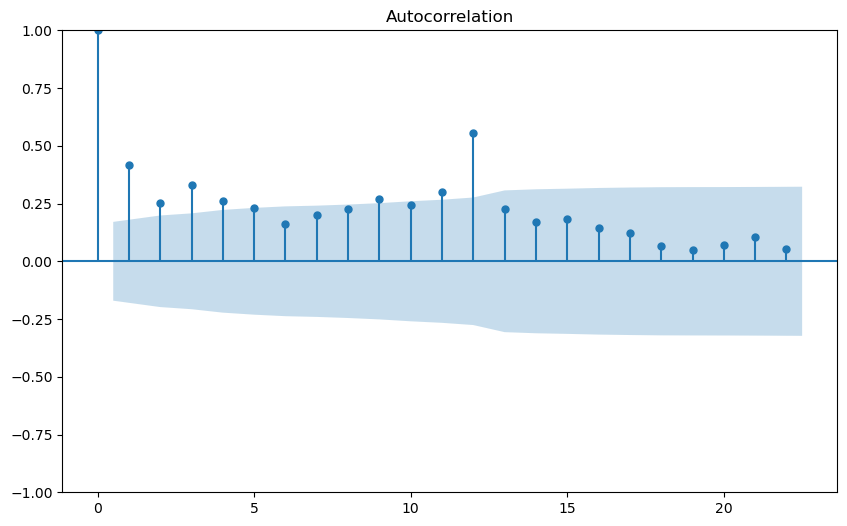

In [1241]:
plot_acf(train2['Rose'],alpha=0.05);

In [1242]:
SARIMA_AIC2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1243]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [1244]:
SARIMA_AIC2 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC2

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [1245]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model2 = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA2 = SARIMA_model2.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA2.aic))
        SARIMA_AIC2 = SARIMA_AIC2.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA2.aic}, ignore_index=True)

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00750D+00    |proj g|=  3.85985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.652D-07   5.007D+00
  F =   5.0074461648784689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1323.9657875279158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.27823D+00    |proj g|=  8.36235D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   1.156D-06   4.278D+00
  F =   4.2782324354224350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1137.4533629515229
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30781D+00    |proj g|=  2.58085D-01

At iterate    5    f=  4.23375D+00    |proj g|=  8.05856D-01

At iterate   10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     51      1     0     0   1.204D-04   4.193D+00
  F =   4.1932668281439112     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1117.0224426299926
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.82449D+00    |proj g|=  1.76895D-01

At iterate    5    f=  4.77773D+00    |proj g|=  7.90028D-03

At iterate   10    f=  4.77354D+00    |proj g|=  1.64496D-01

At iterate   15

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   25    f=  4.37147D+00    |proj g|=  1.69820D-01

At iterate   30    f=  4.36530D+00    |proj g|=  2.26865D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     44      1     0     0   1.166D-05   4.365D+00
  F =   4.3652978233885724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1160.4386253745831
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23995D+00    |proj g|=  1.12110D-01

At iterate    5

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  4.23166D+00    |proj g|=  2.86345D-02

At iterate   10    f=  4.22375D+00    |proj g|=  4.32057D-02

At iterate   15    f=  4.17863D+00    |proj g|=  3.16354D-01

At iterate   20    f=  4.15331D+00    |proj g|=  9.43904D-02

At iterate   25    f=  4.12254D+00    |proj g|=  4.40521D-02

At iterate   30    f=  4.11994D+00    |proj g|=  1.99116D-02

At iterate   35    f=  4.11987D+00    |proj g|=  1.27890D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     70      2     0     0   3.846D-05   4.120D+00
  F =   4.1198693865563625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1097.6455180508797
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17245D+00    |proj g|=  1.04305D-01

At iterate    5    f=  4.13913D+00    |proj g|=  5.21358D-02

At iterate   10    f=  4.13408D+00    |proj g|=  2.79943D-02

At iterate   15

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  4.48500D+00    |proj g|=  1.84408D-02

At iterate   20    f=  4.48485D+00    |proj g|=  3.62874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     24      1     0     0   3.629D-06   4.485D+00
  F =   4.4848549979405457     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1192.001719456304
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14936D+00    |proj g|=  1.29674D-01

At iterate    5 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  4.60190D+00    |proj g|=  1.69176D-02

At iterate   10    f=  4.60182D+00    |proj g|=  7.74579D-03

At iterate   15    f=  4.60017D+00    |proj g|=  3.32134D-02

At iterate   20    f=  4.59853D+00    |proj g|=  1.11798D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   6.187D-06   4.599D+00
  F =   4.5985349410968279     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1222.0132244495626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1061.435984605108
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19830D+00    |proj g|=  8.72028D-02

At iterate    5    f=  4.19062D+00    |proj g|=  2.01872D-02

At iterate   10    f=  4.10632D+00    |proj g|=  1.87396D-01

At iterate   15    f=  4.08723D+00    |proj g|=  6.72449D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   3.250D-05   4.087D+00
  F =   4.0872140071239746     

CONVERGENCE: REL

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.08419D+00    |proj g|=  8.30956D-04

At iterate   25    f=  4.08419D+00    |proj g|=  1.49183D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   1.492D-05   4.084D+00
  F =   4.0841913151173754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1090.2265071909871
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08345D+00    |proj g|=  7.69276D-02

At iterate    5

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  4.01005D+00    |proj g|=  2.37352D-01

At iterate   20    f=  3.90971D+00    |proj g|=  2.07479D-01

At iterate   25    f=  3.90087D+00    |proj g|=  3.16476D-02

At iterate   30    f=  3.90000D+00    |proj g|=  4.77358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     42      1     0     0   2.119D-06   3.900D+00
  F =   3.9000009892072778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1043.6002611507213
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  4.71165D+00    |proj g|=  2.94778D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   2.948D-05   4.712D+00
  F =   4.7116527368436980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1249.8763225267362
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33806D+00    |proj g|=  1.40381D-01

At iterate    5    f=  4.31820D+00    |proj g|=  2.47797D-02

At iterate   10

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1133.8029696527778
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28997D+00    |proj g|=  5.39701D-02

At iterate    5    f=  4.26078D+00    |proj g|=  1.27964D-01

At iterate   10    f=  4.22456D+00    |proj g|=  7.21187D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   2.841D-06   4.225D+00
  F =   4.2245568746136684     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1120.9425392418038
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27681D+00    |proj g|=  8.01400D-02

At iterate    5    f=  4.26170D+00    |proj g|=  2.64319D-02

At iterate   10    f=  4.25579D+00    |proj g|=  3.60051D-02

At iterate   15    f=  4.18977D+00    |proj g|=  1.07412D-01

At iterate   20    f=  4.14513D+00    |proj g|=  4.54890D-02

At iterate   25    f=  4.14360D+00    |proj g|=  2.11152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  4.76606D+00    |proj g|=  8.28630D-03

At iterate   10    f=  4.76563D+00    |proj g|=  5.22838D-02

At iterate   15    f=  4.75911D+00    |proj g|=  1.03025D-01

At iterate   20    f=  4.75827D+00    |proj g|=  7.19780D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   7.198D-07   4.758D+00
  F =   4.7582727516119370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1262.1840064255514
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  4.49146D+00    |proj g|=  1.86127D-01

At iterate   15    f=  4.43992D+00    |proj g|=  7.59879D-02

At iterate   20    f=  4.43807D+00    |proj g|=  7.58632D-02

At iterate   25    f=  4.38360D+00    |proj g|=  5.38852D-01

At iterate   30    f=  4.36533D+00    |proj g|=  2.33436D-02

At iterate   35    f=  4.36524D+00    |proj g|=  3.95100D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     53      1     0     0   3.951D-05   4.365D+00
  F =   4.3652424259010232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1162.42400043787

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  4.11671D+00    |proj g|=  5.51495D-02

At iterate   20    f=  4.07362D+00    |proj g|=  1.10921D-01

At iterate   25    f=  4.05780D+00    |proj g|=  1.83404D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     34      1     0     0   1.135D-05   4.058D+00
  F =   4.0577976645392919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1083.258583438373
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


At iterate   15    f=  4.06808D+00    |proj g|=  5.42665D-02

At iterate   20    f=  4.06781D+00    |proj g|=  4.24816D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   4.248D-06   4.068D+00
  F =   4.0678056482071323     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1083.900691126683
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.20599D+00    |proj g|=  1.20998D-01

At iterate    5  

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  3.93842D+00    |proj g|=  1.15551D-01

At iterate   25    f=  3.93501D+00    |proj g|=  1.21769D-02

At iterate   30    f=  3.93477D+00    |proj g|=  2.06860D-03

At iterate   35    f=  3.93477D+00    |proj g|=  4.92358D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     44      1     0     0   4.924D-05   3.935D+00
  F =   3.9347669307943405     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1052.7784697297059
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  4.48437D+00    |proj g|=  6.29558D-03

At iterate   15    f=  4.48388D+00    |proj g|=  8.83730D-03

At iterate   20    f=  4.48214D+00    |proj g|=  8.17744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   3.070D-05   4.482D+00
  F =   4.4821227490858213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1193.2804057586568
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   25    f=  4.36444D+00    |proj g|=  2.85234D-01

At iterate   30    f=  4.35106D+00    |proj g|=  2.95501D-02

At iterate   35    f=  4.34746D+00    |proj g|=  9.29493D-02

At iterate   40    f=  4.33248D+00    |proj g|=  8.74594D-02

At iterate   45    f=  4.33137D+00    |proj g|=  3.35676D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     71      1     0     0   2.253D-04   4.331D+00
  F =   4.3313746636964963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1155.482911215875
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  4.11660D+00    |proj g|=  5.59897D-02

At iterate   15    f=  4.06431D+00    |proj g|=  6.16620D-02

At iterate   20    f=  4.05132D+00    |proj g|=  1.03812D-01

At iterate   25    f=  4.02558D+00    |proj g|=  1.21316D-01

At iterate   30    f=  3.96830D+00    |proj g|=  3.50822D-02

At iterate   35    f=  3.96721D+00    |proj g|=  1.04527D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     47      1     0     0   8.565D-06   3.967D+00
  F =   3.9672077416492479     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1061.34284379540

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17311D+00    |proj g|=  7.17333D-02

At iterate    5    f=  4.15183D+00    |proj g|=  2.95106D-02

At iterate   10    f=  4.14200D+00    |proj g|=  1.82256D-02

At iterate   15    f=  4.12443D+00    |proj g|=  6.09070D-02

At iterate   20    f=  4.10961D+00    |proj g|=  8.16954D-02

At iterate   25    f=  4.10193D+00    |proj g|=  6.89193D-02


 This problem is unconstrained.



At iterate   30    f=  4.09415D+00    |proj g|=  2.19165D-01

At iterate   35    f=  4.09112D+00    |proj g|=  2.13399D-01

At iterate   40    f=  4.08886D+00    |proj g|=  6.63940D-01

At iterate   45    f=  4.08859D+00    |proj g|=  3.08394D-01

At iterate   50    f=  4.08767D+00    |proj g|=  1.14007D-01

At iterate   55    f=  4.08718D+00    |proj g|=  4.04545D-01

At iterate   60    f=  4.08234D+00    |proj g|=  2.53699D-01

At iterate   65    f=  4.08224D+00    |proj g|=  2.78465D-02

At iterate   70    f=  4.08223D+00    |proj g|=  1.98134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     71    112   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  4.04582D+00    |proj g|=  4.18819D-02
  ys=-2.392E-03  -gs= 4.458E-02 BFGS update SKIPPED

At iterate   15    f=  4.01725D+00    |proj g|=  5.85116D-02

At iterate   20    f=  3.98996D+00    |proj g|=  1.58977D-01

At iterate   25    f=  3.93347D+00    |proj g|=  1.00902D-01

At iterate   30    f=  3.91384D+00    |proj g|=  3.78853D-02

At iterate   35    f=  3.91222D+00    |proj g|=  6.41203D-03

At iterate   40    f=  3.91096D+00    |proj g|=  7.31448D-02

At iterate   45    f=  3.89535D+00    |proj g|=  2.32431D-01

At iterate   50    f=  3.88518D+00    |proj g|=  1.68854D-02

At iterate   55    f=  3.88506D+00    |proj g|=  3.29103D-04

At iterate   60    f=  3.88506D+00    |proj g|=  2.88304D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy poi

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59058D+00    |proj g|=  7.46750D-02

At iterate    5    f=  4.58760D+00    |proj g|=  8.59003D-04

At iterate   10    f=  4.58746D+00    |proj g|=  7.57675D-03

At iterate   15    f=  4.58737D+00    |proj g|=  7.74866D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     17      1     0     0   7.749D-05   4.587D+00
  F =   4.5873729499564631     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.16561D+00    |proj g|=  1.56878D-02

At iterate   25    f=  4.16542D+00    |proj g|=  1.01290D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   5.059D-06   4.165D+00
  F =   4.1654176063219923     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1111.670248069006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19186D+00    |proj g|=  8.82072D-02

At iterate    5 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  4.17405D+00    |proj g|=  5.24143D-02

At iterate   10    f=  4.16620D+00    |proj g|=  3.82724D-02

At iterate   15    f=  4.09671D+00    |proj g|=  8.01279D-02

At iterate   20    f=  4.09490D+00    |proj g|=  1.02941D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   5.179D-06   4.095D+00
  F =   4.0949004269247116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1093.0537127081238
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate    5    f=  4.15220D+00    |proj g|=  2.14452D-02

At iterate   10    f=  4.13348D+00    |proj g|=  7.92493D-02

At iterate   15    f=  4.09320D+00    |proj g|=  1.10603D-01

At iterate   20    f=  4.07192D+00    |proj g|=  5.44631D-02

At iterate   25    f=  4.03751D+00    |proj g|=  1.39233D-01

At iterate   30    f=  4.03263D+00    |proj g|=  2.48240D-03

At iterate   35    f=  4.03262D+00    |proj g|=  2.47384D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     47      1     0     0   2.474D-05   4.033D+00
  F =   4.0326192202606634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22663D+00    |proj g|=  1.29075D-01

At iterate    5    f=  4.17817D+00    |proj g|=  6.14070D-02

At iterate   10    f=  4.17106D+00    |proj g|=  1.26856D-02

At iterate   15    f=  4.12939D+00    |proj g|=  1.17804D-01

At iterate   20    f=  4.09277D+00    |proj g|=  1.52495D-02

At iterate   25    f=  4.09271D+00    |proj g|=  5.03775D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   5.038D-06   4.093D+00
  F =   4.0927100820279

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   15    f=  4.50984D+00    |proj g|=  1.12810D-01

At iterate   20    f=  4.50695D+00    |proj g|=  1.12853D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   8.541D-05   4.507D+00
  F =   4.5069454024218150     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1199.8335862393592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56324D+00    |proj g|=  1.18000D-01

At iterate    5

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.10054D+00    |proj g|=  1.41766D-01

At iterate   25    f=  4.03734D+00    |proj g|=  1.03739D-02

At iterate   30    f=  4.03719D+00    |proj g|=  2.69124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     49      1     0     0   2.992D-05   4.037D+00
  F =   4.0371926906767763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1079.818870338669
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1071.6995915092205
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16038D+00    |proj g|=  7.56172D-02

At iterate    5    f=  4.12931D+00    |proj g|=  3.64519D-02

At iterate   10    f=  4.12039D+00    |proj g|=  6.76451D-02

At iterate   15    f=  4.00594D+00    |proj g|=  1.39791D-01

At iterate   20    f=  3.99474D+00    |proj g|=  1.07045D-02

At iterate   25    f=  3.99424D+00    |proj g|=  5.68787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  3.92849D+00    |proj g|=  1.99343D-01

At iterate   25    f=  3.92320D+00    |proj g|=  1.02615D-02

At iterate   30    f=  3.92301D+00    |proj g|=  8.74947D-04

At iterate   35    f=  3.92301D+00    |proj g|=  9.53547D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     51      1     0     0   9.535D-05   3.923D+00
  F =   3.9230055331531197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1051.6734607524236
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  4.71353D+00    |proj g|=  1.07438D-02

At iterate   15    f=  4.71322D+00    |proj g|=  3.83088D-03

At iterate   20    f=  4.71197D+00    |proj g|=  1.46768D-02

At iterate   25    f=  4.71178D+00    |proj g|=  1.58877D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   9.645D-06   4.712D+00
  F =   4.7117811046010285     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1253.9102116146714
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.07598D+00    |proj g|=  7.18506D-02

At iterate   25    f=  4.04815D+00    |proj g|=  5.96871D-02

At iterate   30    f=  4.04757D+00    |proj g|=  1.83154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     43      1     0     0   5.729D-06   4.048D+00
  F =   4.0475685732356084     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1082.5581033342007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.
/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.


At iterate    5    f=  4.50939D+00    |proj g|=  2.92413D-02

At iterate   10    f=  4.50552D+00    |proj g|=  6.17048D-03

At iterate   15    f=  4.50514D+00    |proj g|=  1.15361D-02

At iterate   20    f=  4.50179D+00    |proj g|=  2.14971D-02

At iterate   25    f=  4.50160D+00    |proj g|=  2.30593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     30      1     0     0   5.233D-06   4.502D+00
  F =   4.5015975350420332     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1200.4217492510968
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.04251D+00    |proj g|=  6.94912D-02

At iterate   25    f=  4.00178D+00    |proj g|=  6.77930D-02

At iterate   30    f=  3.99424D+00    |proj g|=  5.44751D-02

At iterate   35    f=  3.97322D+00    |proj g|=  1.53076D-01

At iterate   40    f=  3.96677D+00    |proj g|=  2.14659D-02

At iterate   45    f=  3.96633D+00    |proj g|=  1.03062D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     65      1     0     0   6.741D-05   3.966D+00
  F =   3.9663269803111012     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1063.11032280213

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  4.04742D+00    |proj g|=  8.11181D-02

At iterate   25    f=  4.02269D+00    |proj g|=  6.05076D-02

At iterate   30    f=  4.01402D+00    |proj g|=  6.01510D-03

At iterate   35    f=  4.01400D+00    |proj g|=  5.74311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     50      1     0     0   5.743D-05   4.014D+00
  F =   4.0140005522078885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1073.6961457828825
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0 

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   10    f=  4.11103D+00    |proj g|=  3.93525D-02

At iterate   15    f=  4.08553D+00    |proj g|=  6.06662D-02

At iterate   20    f=  4.07435D+00    |proj g|=  7.35316D-02

At iterate   25    f=  4.04267D+00    |proj g|=  5.26906D-02

At iterate   30    f=  4.00617D+00    |proj g|=  1.22196D-01

At iterate   35    f=  3.99358D+00    |proj g|=  2.35247D-02

At iterate   40    f=  3.99272D+00    |proj g|=  2.48778D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44     54      1     0     0   1.452D-06   3.993D+00
  F =   3.9927165904376531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

 This problem is unconstrained.



At iterate   20    f=  3.94296D+00    |proj g|=  6.46248D-02

At iterate   25    f=  3.92293D+00    |proj g|=  1.84574D-01

At iterate   30    f=  3.90401D+00    |proj g|=  7.14521D-01

At iterate   35    f=  3.89471D+00    |proj g|=  1.04642D+00

At iterate   40    f=  3.89280D+00    |proj g|=  4.37178D-02

At iterate   45    f=  3.89167D+00    |proj g|=  4.44454D-01

At iterate   50    f=  3.89126D+00    |proj g|=  3.74308D-02

At iterate   55    f=  3.89125D+00    |proj g|=  3.72492D-02

At iterate   60    f=  3.89112D+00    |proj g|=  1.44409D-01

At iterate   65    f=  3.89103D+00    |proj g|=  4.50093D-02

At iterate   70    f=  3.89102D+00    |proj g|=  6.26437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/var/folders/9w/kpm27gb95m3g8t427y0dd14m0000gn/T/ipykernel_41258/2450011390.py:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [1246]:
SARIMA_AIC2.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1041.655818
26  (0, 1, 2)  (2, 0, 2, 6)  1043.600261
80  (2, 1, 2)  (2, 0, 2, 6)  1045.229978
71  (2, 1, 1)  (2, 0, 2, 6)  1051.673461
44  (1, 1, 1)  (2, 0, 2, 6)  1052.778470

In [1247]:
import statsmodels.api as sm

auto_SARIMA_2 = sm.tsa.statespace.SARIMAX(train2['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_2 = auto_SARIMA_2.fit(maxiter=1000)
print(results_auto_SARIMA_2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08345D+00    |proj g|=  7.69276D-02

At iterate    5    f=  4.06916D+00    |proj g|=  4.47674D-02

At iterate   10    f=  4.06496D+00    |proj g|=  3.19556D-02

At iterate   15    f=  4.01005D+00    |proj g|=  2.37352D-01

At iterate   20    f=  3.90971D+00    |proj g|=  2.07479D-01



 This problem is unconstrained.


At iterate   25    f=  3.90087D+00    |proj g|=  3.16476D-02

At iterate   30    f=  3.90000D+00    |proj g|=  4.77358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     42      1     0     0   2.119D-06   3.900D+00
  F =   3.9000009892072778     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -514.800
Date:                         

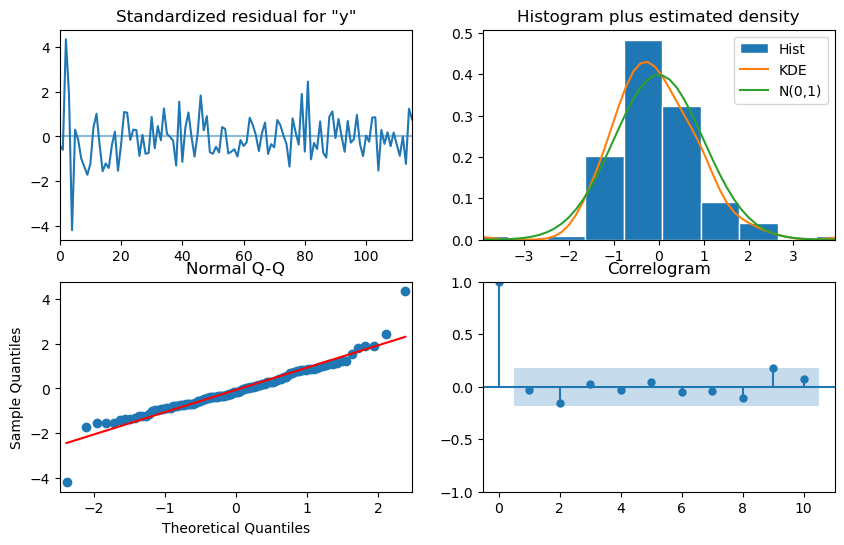

In [1248]:
results_auto_SARIMA_2.plot_diagnostics()
plt.show()

In [1249]:
# ## Predict on the Test Set using this model and evaluate the model.

In [1250]:
predicted_auto_SARIMA_2 = results_auto_SARIMA_2.get_forecast(steps=len(test))

In [1251]:
predicted_auto_SARIMA_2.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  69.067640  19.191877      31.452253     106.683028
1  67.814784  19.663036      29.275942     106.353626
2  76.133654  19.654428      37.611683     114.655624
3  71.775004  19.654426      33.253038     110.296971
4  76.563404  19.654425      38.041439     115.085369

In [1252]:
rmse = mean_squared_error(test2['Rose'],predicted_auto_SARIMA_2.predicted_mean,squared=False)
print(rmse)

27.393732836163334


In [1263]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([temp_resultsDf, resultsDf2,temp_resultsDf])

resultsDf

RMSE    Test RMSE
SARIMA(0,1,2)(2,0,2,6)                              27.393733          NaN
Alpha=0.99,SES                                            NaN  1338.004623
Alpha=1,Beta=0.0189:DES                                   NaN  3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                        NaN   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES        NaN   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES        NaN   403.125867
RegressionOnTime                                          NaN    57.772711
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES        NaN   403.125867
NaiveModel                                                NaN  3864.279352
SimpleAverageModel                                        NaN  1275.081804
SimpleAverageModel                                        NaN  1275.081804
Best ARIMA Model : ARIMA(3,0,3)                     27.393733          NaN
SARIMA(0,1,2)(2,0,2,6)                              27.393733          NaN

In [1264]:
# Building the most optimum model on the Full Data.

In [1255]:
full_data_model2 = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model2 = full_data_model2.fit(maxiter=1000)
print(results_full_data_model2.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11813D+00    |proj g|=  6.32432D-02

At iterate    5    f=  4.10420D+00    |proj g|=  4.49301D-02

At iterate   10    f=  4.09734D+00    |proj g|=  1.01966D-01

At iterate   15    f=  4.02294D+00    |proj g|=  4.42966D-01


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.



At iterate   20    f=  3.94607D+00    |proj g|=  6.84894D-02

At iterate   25    f=  3.92612D+00    |proj g|=  1.06221D-02

At iterate   30    f=  3.92604D+00    |proj g|=  6.96073D-04

At iterate   35    f=  3.92603D+00    |proj g|=  1.09354D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     49      1     0     0   5.235D-05   3.926D+00
  F =   3.9260264672398981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                 

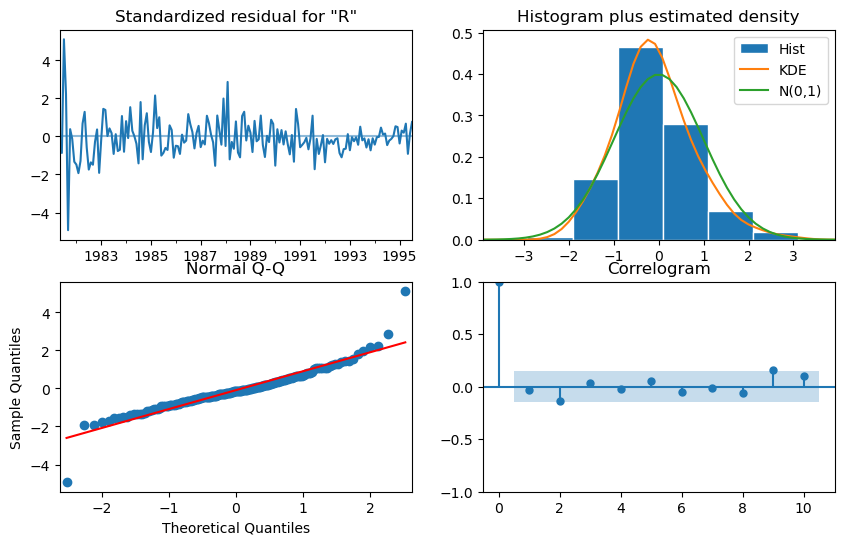

In [1256]:
results_full_data_model2.plot_diagnostics();

In [1257]:
predicted_manual_SARIMA_6_full_data = results_full_data_model2.get_forecast(steps=17)

In [1258]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  51.805768  16.965082      18.554818      85.056718
1995-09-01  48.520952  17.567823      14.088651      82.953253
1995-10-01  51.827326  17.620721      17.291348      86.363304
1995-11-01  52.495892  17.673460      17.856547      87.135237
1995-12-01  70.882877  17.726042      36.140473     105.625281

In [1259]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.050941294587098


In [1260]:
rmse = mean_squared_error(test2['Rose'],predicted_auto_SARIMA_2.predicted_mean,squared=False)
print(rmse)

27.393732836163334


In [1261]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

Test RMSE       RMSE
Alpha=0.99,SES                                      1338.004623        NaN
Alpha=1,Beta=0.0189:DES                             3949.931298        NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
RegressionOnTime                                      57.772711        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
NaiveModel                                          3864.279352        NaN
SimpleAverageModel                                  1275.081804        NaN
SARIMA(0,1,2)(2,0,2,6)                                      NaN  27.393733
Alpha=0.99,SES                                      1338.004623        NaN
Alpha=1,Beta=0.0189:DES                             3949.931298        NaN
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                   378.944325        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
RegressionOnTime                                      57.772711        NaN
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES   403.125867        NaN
NaiveModel                                          3864.279352        NaN
SimpleAverageModel                                  1275.081804        NaN
SimpleAverageModel                                  1275.081804        NaN
Best ARIMA Model : ARIMA(3,0,3)                             NaN  27.393733
SARIMA(0,1,2)(2,0,2,6)                                      NaN  27.393733

# 7.Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [1265]:
resultsDf

RMSE    Test RMSE
SARIMA(0,1,2)(2,0,2,6)                              27.393733          NaN
Alpha=0.99,SES                                            NaN  1338.004623
Alpha=1,Beta=0.0189:DES                                   NaN  3949.931298
Alpha=0.25,Beta=0.0,Gamma=0.74:TES                        NaN   378.944325
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES        NaN   403.125867
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES        NaN   403.125867
RegressionOnTime                                          NaN    57.772711
Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES        NaN   403.125867
NaiveModel                                                NaN  3864.279352
SimpleAverageModel                                        NaN  1275.081804
SimpleAverageModel                                        NaN  1275.081804
Best ARIMA Model : ARIMA(3,0,3)                     27.393733          NaN
SARIMA(0,1,2)(2,0,2,6)                              27.393733          NaN

# 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [1266]:
full_data_model2 = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model2 = full_data_model2.fit(maxiter=1000)
print(results_full_data_model2.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11813D+00    |proj g|=  6.32432D-02

At iterate    5    f=  4.10420D+00    |proj g|=  4.49301D-02

At iterate   10    f=  4.09734D+00    |proj g|=  1.01966D-01

At iterate   15    f=  4.02294D+00    |proj g|=  4.42966D-01

At iterate   20    f=  3.94607D+00    |proj g|=  6.84894D-02

At iterate   25    f=  3.92612D+00    |proj g|=  1.06221D-02

At iterate   30    f=  3.92604D+00    |proj g|=  6.96073D-04

At iterate   35    f=  3.92603D+00    |proj g|=  1.09354D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

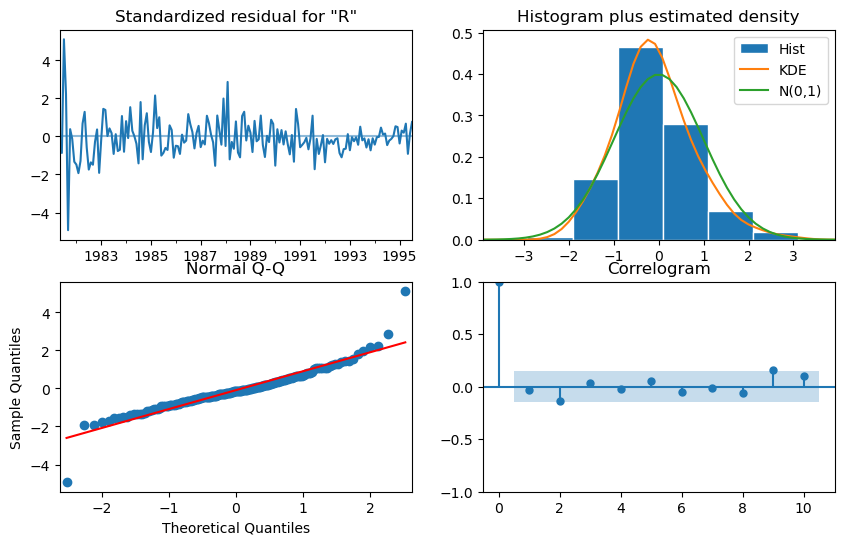

In [1267]:
results_full_data_model2.plot_diagnostics();

In [1269]:
predicted_manual_SARIMA_2_full_data = results_full_data_model2.get_forecast(steps=17)

In [1270]:
predicted_manual_SARIMA_2_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  51.805768  16.965082      18.554818      85.056718
1995-09-01  48.520952  17.567823      14.088651      82.953253
1995-10-01  51.827326  17.620721      17.291348      86.363304
1995-11-01  52.495892  17.673460      17.856547      87.135237
1995-12-01  70.882877  17.726042      36.140473     105.625281

In [1271]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model2.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.050941294587098


In [1272]:
pred_full_manual_SARIMA_date2 = predicted_manual_SARIMA_2_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-12-31', freq='M'))

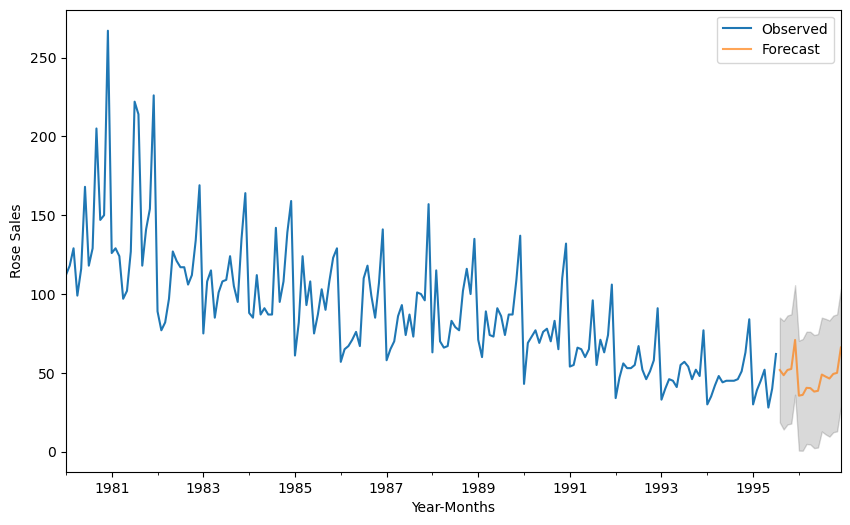

In [1273]:
axis = df2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date2['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date2.index, pred_full_manual_SARIMA_date2['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date2['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose Sales')
plt.legend(loc='best')
plt.show()

In [1274]:
# Thank you!